**Busines Understanding**

To this project I have used data from British transport on car accidents so to predict severity of car accidents based on road, car or road conditions. Hospital directors that plan resources may want to predict risk and severity of accidents on streets to help people that were victims of car accidents. Heads of police departments want to know how to protect citizens and patrol the streets so to limit dangerous behaviour on the streets. Aim of this project is to predict the severity of road accident so to limit the number of incidences on the way and optimize resources to protect victims. To understand this problem I will use British transport data on car accidents from https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data  incident data that uses metrics such as weather and road condition from 2010 to 2018

**INFO about the dataset** 

In the raw dataset there are 53 columns. The aim is to predict severity of the accident using Accident_Severity. 

There are columns that we want to remove from the data: Accident_Index, we joint the datasets using this column and we remove the column. Vehicle_Reference we don't need the column. It is used to identify records for each car that took part in the accident. For 5 cars accident we have 5 different records with vehicle reference 1 to 5. We have 2 columns Was_Vehicle_Left_Hand_Drive so we will remove the duplicate. Location_Easting_OSGR, Location_Northing_OSGR are geographic variables but we have other variables in the data that much better fit our purpose. LSOA_of_Accident_Location has many missing values. 

| Column | Action |
| --- | --- |
| **Vehicle Type** | Car Details |
| **Towing_and_Articulation** | Car details |
| **Was_Vehicle_Left_Hand_Drive?**	| Car Details |
| **Engine_Capacity_(CC)**	| Car Details |
| **Propulsion_Code**	| Car Details |
| **Age_of_Vehicle** | Car details |
| **Journey_Purpose_of_Driver** | Driver Details | 
| **Sex_of_Driver** | Driver Details |
| **Age_Band_of_Driver** | Driver Details |  
| **Driver_IMD_Decile** | Driver Details |
| **Driver_Home_Area_Type** | Driver Details |
| **Longitude** | Geography |
| **Latitude** | Geography |
| **Police_Force** | Geography |
| **Local_Authority_(District)** | Geography |
| **Local_Authority_(Highway)** | Geography |
| **Urban_Or_Rural_Area** | Geography |
| **Date** | Time |
| **Day_of_Week** | Time |
| **Time** | Time |
| **1st_Road_Class** | Road Details |
| **1st_Road_Number** | Road Details |
| **Road_Type** | Road Details |
| **Speed_Limit** | Road Details |
| **Junction_Detail** | Road Details |
| **Junction_Control** | Road Details |
| **2nd_Road_Class** | Road Details |
| **2nd_Road_Number** | Road Details |
| **Pedestrian_Crossing-Human_Control** | Road Details |
| **Pedestrian_Crossing-Physical_Facilities** | Road Details |
| **Road_Surface_Conditions** | Road Details |
| **Light_Conditions** | Light Details |
| **Weather_Conditions** | Weather Details |
| **Vehicle_Manouvre** | Car - Accident info |
| **Vehicle_Location-Restricted_Lane** | Car - Accident Info |
| **Skidding_and_Overturning** | Car - Accident Info |
| **1st_Point_of_Impact** | Car - Accident Info |
| **Hit_Object_in_Carriageway** | Obstacles - Accident Info |
| **Hit_Object_off_Carriageway** | Obstacles - Accident Info |
| **Carriageway_Hazards** | Obstacles - Accident Info |
| **Junction Location** | Position - Accident Info | 
| **Vehicle_Leaving_Carriageway** | Position - Accident Info |
| **Special_Conditions_at_Site** | Road - Accident Info |
| **Number_of_Vehicles** | Severity - Accident Info |
| **Number_of_Casualties** | Severity - Accident Info |
| **Did_Police_Officer_Attend_Scence_of_Accident** | Severity - Accident Info |
| **Accident_Severity** | Severity Info |

#### Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [2]:
# 2014 does not have Vehicle_IMD_Decile
# 2013 - 2010 does not have 'Age_of_Driver' and Vehicle_IMD_Decile - should change column name

vehicles_2018 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2018/dftRoadSafetyData_Vehicles_2018.csv")
vehicles_2017 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2017/Veh.csv")
vehicles_2016 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2016/Veh.csv")
vehicles_2015 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2015/Vehicles_2015.csv")
vehicles_2014 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2014/DfTRoadSafety_Vehicles_2014.csv")
vehicles_2013 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2013/DfTRoadSafety_Vehicles_2013.csv")
vehicles_2012 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2012/DfTRoadSafety_Vehicles_2012.csv")
vehicles_2011 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2011/DfTRoadSafety_Vehicles_2011.csv")
vehicles_2010 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2010/DfTRoadSafety_Vehicles_2010.csv")

C:\Users\fajlh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
vehicles_2018.drop(columns = ['Age_of_Driver', 'Vehicle_IMD_Decile'], inplace = True)
vehicles_2017.drop(columns = ['Age_of_Driver', 'Vehicle_IMD_Decile'], inplace = True)
vehicles_2016.drop(columns = ['Age_of_Driver', 'Vehicle_IMD_Decile'], inplace = True)
vehicles_2015.drop(columns = ['Age_of_Driver', 'Vehicle_IMD_Decile'], inplace = True)
vehicles_2014.drop(columns = ['Age_of_Driver'], inplace = True)
vehicles_2013.rename(columns = {'Acc_Index' : 'Accident_Index'}, inplace = True)
vehicles_2012.rename(columns = {'Acc_Index' : 'Accident_Index'}, inplace = True)
vehicles_2011.rename(columns = {'Acc_Index' : 'Accident_Index'}, inplace = True)
vehicles_2010.rename(columns = {'Acc_Index' : 'Accident_Index'}, inplace = True)

In [4]:
vehicles = pd.concat([vehicles_2018, vehicles_2017, vehicles_2016, vehicles_2015, vehicles_2014, vehicles_2013, vehicles_2012, vehicles_2011, vehicles_2010], ignore_index=True)

In [5]:
vehicles.shape

(2320553, 22)

In [6]:
Accidents_2018 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2018/dftRoadSafetyData_Accidents_2018.csv")
Accidents_2017 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2017/Acc.csv")
Accidents_2016 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2016/dftRoadSafety_Accidents_2016.csv")
Accidents_2015 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2015/Accidents_2015.csv")
Accidents_2014 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2014/DfTRoadSafety_Accidents_2014.csv")
Accidents_2013 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2013/DfTRoadSafety_Accidents_2013.csv")
Accidents_2012 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2012/DfTRoadSafety_Accidents_2012.csv")
Accidents_2011 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2011/DfTRoadSafety_Accidents_2011.csv")
Accidents_2010 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2010/DfTRoadSafety_Accidents_2010.csv")

C:\Users\fajlh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\fajlh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
accidents = pd.concat([Accidents_2018, Accidents_2017, Accidents_2016, Accidents_2015, Accidents_2014, Accidents_2013, Accidents_2012, Accidents_2011, Accidents_2010], ignore_index=True)

In [8]:
print(accidents.shape)

(1265735, 32)


In [9]:
data = pd.merge(accidents, vehicles, how='left', on='Accident_Index')

#### First understanding of data - Individual stories

In [10]:
# I don't need info on casualities if my interest is to predict severity. 
print(data.shape)
print(data.columns)

(2289204, 53)
Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'H

First let us understand if more important for severity of car accident is Number_of_Casualties or Number_of_Vehicles

In [11]:
print("The accident with maximum number of vehicles was not on the same date as accident with maximum number of fatalities")
print("The maximum number of casualities recorded during car accident was: {} on date: {}".format(data['Number_of_Casualties'].max(), '20/10/2014'))
print("The maximum number of vehicles recorded during car accident was: {} on date: {}".format(data['Number_of_Vehicles'].max(), '05/09/2013'))

The accident with maximum number of vehicles was not on the same date as accident with maximum number of fatalities
The maximum number of casualities recorded during car accident was: 93 on date: 20/10/2014
The maximum number of vehicles recorded during car accident was: 67 on date: 05/09/2013


In [12]:
# We take the unique dates for accidents with big number of casualities. 
# This will help us to find records of accidents in press. 
# We need to remember that these are records from more than 3 years ago so some will be missing. 
data[data['Number_of_Casualties'] > 30]['Date'].unique()

array(['10/07/2018', '27/12/2017', '15/06/2017', '09/02/2017',
       '14/07/2016', '23/09/2015', '14/02/2015', '06/07/2015',
       '24/01/2015', '26/03/2015', '03/06/2014', '10/11/2014',
       '20/10/2014', '19/08/2014', '13/10/2013', '05/09/2013',
       '24/03/2012', '15/10/2012', '08/06/2012', '20/06/2011',
       '31/01/2011', '30/04/2011', '04/11/2011', '24/05/2010',
       '24/12/2010', '24/09/2010', '16/04/2010', '31/03/2010'],
      dtype=object)

I would like to investigate more closely accidents from: 04/11/2011, 05/09/2013, 14/02/2015 just so to remind us that this is real life data. That's someones real life stories:

**04/11/2011**: mass of crashed vehicles described by emergency worker as “the worst road traffic collision anoyone can remember”. 7 fatal victims, 51 injured and 34 cars taking part in this collision close to junction 25 of the M5’s northbound carriageway. Drivers reported a white wall of fog. People said that smoke from fireworks at the rugby club next to the motorway might have contributed to the poor visibility. There was also huge fireworks display that could distract the drivers. Cars that were driving slow managed to escape but cars speeding up with 60-70mph were just colliding one onto another. 3 lorries collide including one full of deodorants and cans. People were trapped in their vehicles and were screaming. 
[Video from the place of accident: ](https://www.youtube.com/watch?v=1ZdsxShKJe0)

*Just reading information from the data we know that*:
1. It was reported as fatal incident with 5 casualities. From the news we know that 7 so 5 people reported on the place and 2 passed in the hospital
2. It was friday at 8:23pm Local_Authority_(District) - Taunton Deane. 
3. That was on Motorway, dual carriageway with speed limit 70. Not on junction or not junction within 20 meters. 
4. No pedestrians involved. It was reported as daylight, which can't be true as that was November after 8pm. 
5. Weather condition from report as 9: Unknown but we know from press and reports that was fog, 100% humidity and dark outside, Road_Surface_Conditions: reported as 1 - dry That is not true as it was fog with humidity 100%
6. 6 Goods vehicles 7.5 tonnes mgw and over, 1 Van / Goods 3.5 tonnes mgw or under and rest normal cars (plot1)
7. 3 female drivers and rest male drivers. (plot2)

*Important points for Analytics purposes*:
1. Important the severity is from 1 - 3 with 1 the highest
2. As that's interesting during data exploration this level is too granular and we won't include Local_Authority_(District) for our model
3. We can notice that we have multiple records for each accident as the details for vehicles are specific for particular vehicle.
4. We can remove the 1st_Road_Number and 2nd_Road_Number as does not say something relevant for the model
5. -1 in our data replaces missing number. Good to know how many missing data we really have in our dataset
6. Would be good to put incidents on map after removing duplicates
7. Do bar chrt for Age_Band_of_Driver

In [13]:
from IPython.display import display
pd.options.display.max_columns = None
M5 = data[(data['Date'] == '04/11/2011') & (data['Number_of_Vehicles'] == 34)]
M5.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Was_Vehicle_Left_Hand_Drive
1964887,2011520104001,326090.0,125620.0,-3.055272,51.025121,52,1,34,51,04/11/2011,6,20:23,608,E10000027,1,5,3,70.0,0,-1,-1,0,0,0,1,9,1,0,0,2,1,E01029317,1.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,NaN,6.0,1.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1964888,2011520104001,326090.0,125620.0,-3.055272,51.025121,52,1,34,51,04/11/2011,6,20:23,608,E10000027,1,5,3,70.0,0,-1,-1,0,0,0,1,9,1,0,0,2,1,E01029317,2.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,NaN,6.0,1.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1964889,2011520104001,326090.0,125620.0,-3.055272,51.025121,52,1,34,51,04/11/2011,6,20:23,608,E10000027,1,5,3,70.0,0,-1,-1,0,0,0,1,9,1,0,0,2,1,E01029317,3.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN,6.0,1.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1964890,2011520104001,326090.0,125620.0,-3.055272,51.025121,52,1,34,51,04/11/2011,6,20:23,608,E10000027,1,5,3,70.0,0,-1,-1,0,0,0,1,9,1,0,0,2,1,E01029317,4.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,NaN,6.0,1.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1964891,2011520104001,326090.0,125620.0,-3.055272,51.025121,52,1,34,51,04/11/2011,6,20:23,608,E10000027,1,5,3,70.0,0,-1,-1,0,0,0,1,9,1,0,0,2,1,E01029317,5.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,NaN,6.0,1.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0


Text(0,0.5,'Number_of_Vehicles')

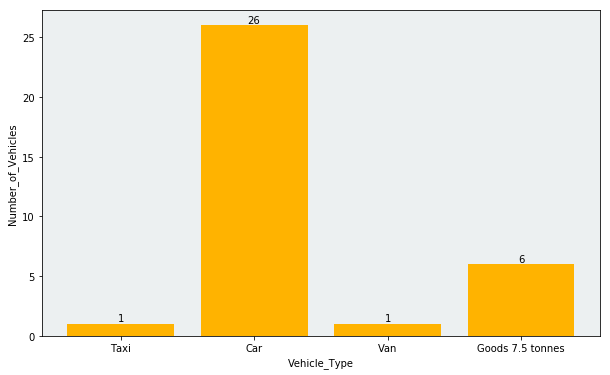

In [14]:
# We need to make sure that variables has good dataytype and change the values using info from meta data
df = pd.DataFrame(M5, columns = ['Vehicle_Type', 'Vehicle_Reference']).groupby(['Vehicle_Type'], as_index = False).count()
df['Vehicle_Type'] = df['Vehicle_Type'].apply(str)
df['Vehicle_Type'] = df['Vehicle_Type'].map({'8.0': 'Taxi', '9.0': 'Car', '19.0': 'Van', '21.0': 'Goods 7.5 tonnes'})
# df['Vehicle_Type'].rename_categories({'8.0': 'Taxi', '9.0': 'Car', '19.0': 'Van', '21.0': 'Goods 7.5 tonnes'})
plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor("#ECF0F1")
plt.bar(df['Vehicle_Type'],df['Vehicle_Reference'], color = '#FFB300')
for x,y in zip(df['Vehicle_Type'],df['Vehicle_Reference']):
    plt.text(x, y+0.05, '%d' % y, ha='center' , va= 'bottom')
plt.xlabel('Vehicle_Type')
plt.ylabel('Number_of_Vehicles')

Text(0,0.5,'Number_of_Vehicles')

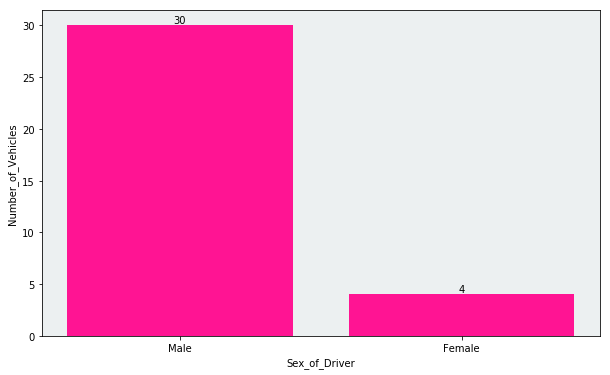

In [15]:
# We need to make sure that variables has good dataytype and change the values using info from meta data
df = pd.DataFrame(M5, columns = ['Sex_of_Driver', 'Vehicle_Reference']).groupby(['Sex_of_Driver'], as_index = False).count()
df['Sex_of_Driver'] = df['Sex_of_Driver'].apply(str)
df['Sex_of_Driver'] = df['Sex_of_Driver'].map({'1.0': 'Male', '2.0': 'Female', '3.0': 'Not known'})
# df['Vehicle_Type'].rename_categories({'8.0': 'Taxi', '9.0': 'Car', '19.0': 'Van', '21.0': 'Goods 7.5 tonnes'})
plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor("#ECF0F1")
plt.bar(df['Sex_of_Driver'],df['Vehicle_Reference'], color = 'deeppink')
for x,y in zip(df['Sex_of_Driver'],df['Vehicle_Reference']):
    plt.text(x, y+0.05, '%d' % y, ha='center' , va= 'bottom')
plt.xlabel('Sex_of_Driver')
plt.ylabel('Number_of_Vehicles')

Text(0,0.5,'Number_of_Vehicles')

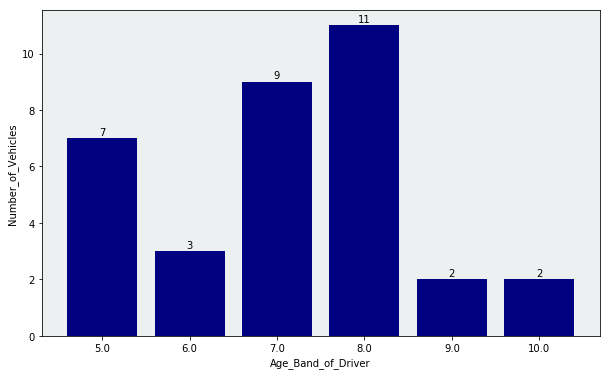

In [16]:
# We need to make sure that variables has good dataytype and change the values using info from meta data
df = pd.DataFrame(M5, columns = ['Age_Band_of_Driver', 'Vehicle_Reference']).groupby(['Age_Band_of_Driver'], as_index = False).count()
df['Age_Band_of_Driver'] = df['Age_Band_of_Driver'].apply(str)
# df['Age_Band_of_Driver'] = df['Age_Band_of_Driver'].map({'5.0': '21 - 25', '6:0' : '26 : 35', '7.0' : '36 - 45', '8.0' : '46 - 55', '9.0' : '56 - 65', '10.0' : '66 - 75'})
# df['Vehicle_Type'].rename_categories()
plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor("#ECF0F1")
plt.bar(df['Age_Band_of_Driver'],df['Vehicle_Reference'], color = 'navy')
for x,y in zip(df['Age_Band_of_Driver'],df['Vehicle_Reference']):
    plt.text(x, y+0.05, '%d' % y, ha='center' , va= 'bottom')
plt.xlabel('Age_Band_of_Driver')
plt.ylabel('Number_of_Vehicles')

**05/09/2013**: Another big accident: Carmageddon. Hundred car pile-up on foggy Sheppey crossing bridge on A249 in Kent at 7.15am. The crash happened as parts of Kent, Essex and parts of London suffered from some areas of dense, patchy fog between 4am and 8.30am. It was forecasted to be mostly dry, sunny and very warm over central, southern and eastern England once the early fog had cleared. After incident there was a call for a safety review on the A249 Sheppey Crossing to look at the speed limit, lack of matrix warning signs and lighting.’ Gordon Henderson, Conservative MP for Sittingbourne and Sheppey, said:‘I have had concerns in the past, particularly about the level of lighting on the bridge.’

Eight people seriously injured and another 200 with minor injuries - 33 people taken to hospital but no fatalities after the incident. A fleet of 30 ambulances and other response vehicles treated some casualties at the roadside. Firefighters used hydraulic cutting equipment to free those who were trapped. Stranded motorists sit on road for up to eight hours in 30C heat but left area by 3pm. The four-lane bridge was shut in both directions.  Bridge reopened at 5.30pm. AA chief sayed crash may have been caused by 'stupid driving' - specifically tailgating and not using fog lights. For more information refer to: [More informtaion you can find in the Guardian article](https://www.dailymail.co.uk/news/article-2412099/Sheppey-crash-chaos-Kent-200-injured-100-vehicle-pile-up.html)

*from our data we see that*: 
1. Accident severity is 2: Serious, number of vehicles 67 and number of casualities 70. Out of these 70 33 taken to hospital rest were injured but not hospitalisation needed. 
2. It was on dual carriageway with speed limit 70. 
3. Light conditions: daylight, wheather conditions: Fog or mist. Road surface: dry. 
4. 1 Taxi, 15 Vans, 1 Goods 7.5 tonnes rest cars
5. 45 male + 22 female drivers
6. 3 drivers in age 16 - 20, 8 in Age 21 - 25, 14  in age 26 - 36, 14 in age 36 - 45, 17 in age 46 - 55 and 10 in age 56 - 65

In [17]:
HighestV = data[(data['Date'] == '05/09/2013') & (data['Number_of_Vehicles'] == 67)]
display(HighestV)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Was_Vehicle_Left_Hand_Drive
1410510,2013460234852,591380.0,169440.0,0.749417,51.39166,46,2,67,70,05/09/2013,5,07:15,540,E10000016,3,249,3,70.0,0,-1,-1,0,0,0,1,7,1,0,0,2,1,E01024597,1.0,19.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,7.0,1598.0,2.0,2.0,5.0,1.0,NaN
1410511,2013460234852,591380.0,169440.0,0.749417,51.39166,46,2,67,70,05/09/2013,5,07:15,540,E10000016,3,249,3,70.0,0,-1,-1,0,0,0,1,7,1,0,0,2,1,E01024597,2.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,6.0,1.0,8.0,1794.0,1.0,12.0,4.0,1.0,NaN
1410512,2013460234852,591380.0,169440.0,0.749417,51.39166,46,2,67,70,05/09/2013,5,07:15,540,E10000016,3,249,3,70.0,0,-1,-1,0,0,0,1,7,1,0,0,2,1,E01024597,3.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,8.0,-1.0,-1.0,-1.0,6.0,1.0,NaN
1410513,2013460234852,591380.0,169440.0,0.749417,51.39166,46,2,67,70,05/09/2013,5,07:15,540,E10000016,3,249,3,70.0,0,-1,-1,0,0,0,1,7,1,0,0,2,1,E01024597,4.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,2.0,6.0,1560.0,2.0,8.0,1.0,1.0,NaN
1410514,2013460234852,591380.0,169440.0,0.749417,51.39166,46,2,67,70,05/09/2013,5,07:15,540,E10000016,3,249,3,70.0,0,-1,-1,0,0,0,1,7,1,0,0,2,1,E01024597,5.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,2.0,4.0,998.0,1.0,13.0,5.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410572,2013460234852,591380.0,169440.0,0.749417,51.39166,46,2,67,70,05/09/2013,5,07:15,540,E10000016,3,249,3,70.0,0,-1,-1,0,0,0,1,7,1,0,0,2,1,E01024597,63.0,19.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,6.0,1.0,5.0,2198.0,2.0,3.0,5.0,1.0,NaN
1410573,2013460234852,591380.0,169440.0,0.749417,51.39166,46,2,67,70,05/09/2013,5,07:15,540,E10000016,3,249,3,70.0,0,-1,-1,0,0,0,1,7,1,0,0,2,1,E01024597,64.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,5.0,1686.0,2.0,6.0,4.0,1.0,NaN
1410574,2013460234852,591380.0,169440.0,0.749417,51.39166,46,2,67,70,05/09/2013,5,07:15,540,E10000016,3,249,3,70.0,0,-1,-1,0,0,0,1,7,1,0,0,2,1,E01024597,65.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,2.0,6.0,1796.0,1.0,14.0,1.0,1.0,NaN
1410575,2013460234852,591380.0,169440.0,0.749417,51.39166,46,2,67,70,05/09/2013,5,07:15,540,E10000016,3,249,3,70.0,0,-1,-1,0,0,0,1,7,1,0,0,2,1,E01024597,66.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,2.0,8.0,-1.0,-1.0,-1.0,6.0,1.0,NaN


Text(0,0.5,'Number_of_Vehicles')

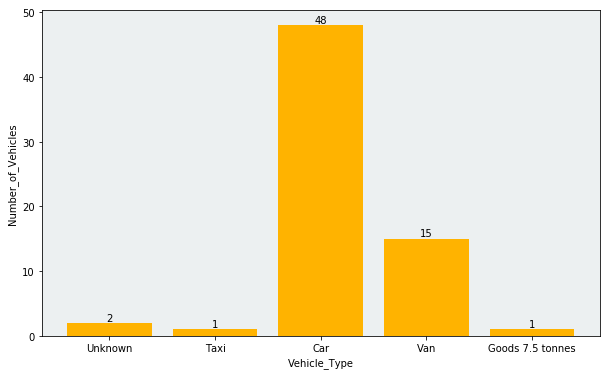

In [18]:
# We need to make sure that variables has good dataytype and change the values using info from meta data
df = pd.DataFrame(HighestV, columns = ['Vehicle_Type', 'Vehicle_Reference']).groupby(['Vehicle_Type'], as_index = False).count()
df['Vehicle_Type'] = df['Vehicle_Type'].apply(str)
df['Vehicle_Type'] = df['Vehicle_Type'].map({'8.0': 'Taxi', '9.0': 'Car', '19.0': 'Van', '21.0': 'Goods 7.5 tonnes'})
plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor("#ECF0F1")
df = df.fillna("Unknown")
plt.bar(df['Vehicle_Type'],df['Vehicle_Reference'], color = '#FFB300')
for x,y in zip(df['Vehicle_Type'],df['Vehicle_Reference']):
    plt.text(x, y+0.05, '%d' % y, ha='center' , va= 'bottom')
plt.xlabel('Vehicle_Type')
plt.ylabel('Number_of_Vehicles')

Text(0,0.5,'Number_of_Vehicles')

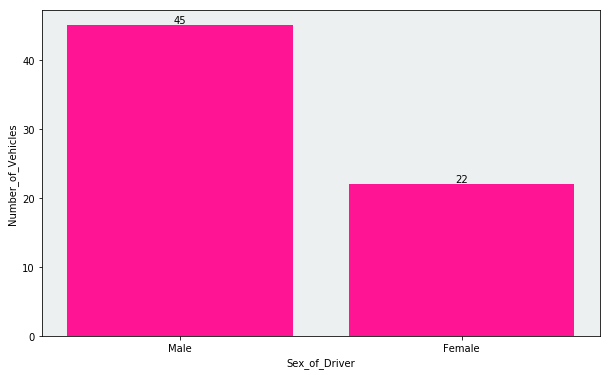

In [19]:
# We need to make sure that variables has good dataytype and change the values using info from meta data
df = pd.DataFrame(HighestV, columns = ['Sex_of_Driver', 'Vehicle_Reference']).groupby(['Sex_of_Driver'], as_index = False).count()
df['Sex_of_Driver'] = df['Sex_of_Driver'].apply(str)
df['Sex_of_Driver'] = df['Sex_of_Driver'].map({'1.0': 'Male', '2.0': 'Female', '3.0': 'Not known'})
# df['Vehicle_Type'].rename_categories({'8.0': 'Taxi', '9.0': 'Car', '19.0': 'Van', '21.0': 'Goods 7.5 tonnes'})
plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor("#ECF0F1")
plt.bar(df['Sex_of_Driver'],df['Vehicle_Reference'], color = 'deeppink')
for x,y in zip(df['Sex_of_Driver'],df['Vehicle_Reference']):
    plt.text(x, y+0.05, '%d' % y, ha='center' , va= 'bottom')
plt.xlabel('Sex_of_Driver')
plt.ylabel('Number_of_Vehicles')

Text(0,0.5,'Number_of_Vehicles')

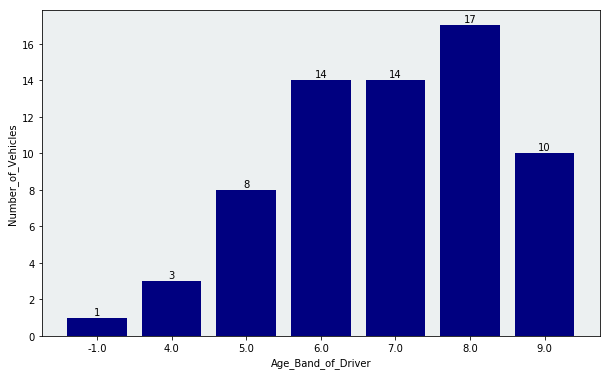

In [20]:
# We need to make sure that variables has good dataytype and change the values using info from meta data
df = pd.DataFrame(HighestV, columns = ['Age_Band_of_Driver', 'Vehicle_Reference']).groupby(['Age_Band_of_Driver'], as_index = False).count()
df['Age_Band_of_Driver'] = df['Age_Band_of_Driver'].apply(str)
# df['Age_Band_of_Driver'] = df['Age_Band_of_Driver'].map({'5.0': '21 - 25', '6:0' : '26 : 35', '7.0' : '36 - 45', '8.0' : '46 - 55', '9.0' : '56 - 65', '10.0' : '66 - 75'})
# df['Vehicle_Type'].rename_categories()
plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor("#ECF0F1")
plt.bar(df['Age_Band_of_Driver'],df['Vehicle_Reference'], color = 'navy')
for x,y in zip(df['Age_Band_of_Driver'],df['Vehicle_Reference']):
    plt.text(x, y+0.05, '%d' % y, ha='center' , va= 'bottom')
plt.xlabel('Age_Band_of_Driver')
plt.ylabel('Number_of_Vehicles')

We could investigate more seperate accidents but the purpose of this project is to understand how to predict severity of car accident so to help citizens and minimalise number of severe accidents and optimise number of hospital resources in the places with higher risk of car accident. To do that let's implement changes on the data that will allow us to visualise overall data. 

#### Data Cleaning

In [21]:
data.dtypes.value_counts()

float64    26
int64      22
object      5
dtype: int64

In [22]:
data['Police_Force'] = data['Police_Force'].astype(str)
data['Police_Force'] = data['Police_Force'].map({'1': 'Metropolitan Police', 
                                                 '3': 'Cumbria', 
                                                 '4': 'Lancashire', 
                                                 '5': 'Merseyside',
                                                '6' : 'Greater Manchester', 
                                                 '7' : 'Cheshire', 
                                                 '10' : 'Northumbria', 
                                                 '11' : 'Durham', 
                                                 '12' : 'North Yorkshire',
                                                '13' : 'West Yorkshire', 
                                                 '14' : 'South Yorkshire', 
                                                 '16' : 'Humberside', 
                                                 '17' : 'Cleveland', 
                                                 '20' : 'West Midlands',
                                                '21' : 'Staffordshire', 
                                                 '22' : 'West Mercia', 
                                                 '23' : 'Warwickshire', 
                                                 '30' : 'Derbyshire', 
                                                 '31' : 'Nottinghamshire', 
                                                 '32' : 'Lincolnshire',
                                                '33' : 'Leicestershire', 
                                                 '34' : 'Northamptonshire', 
                                                 '35' : 'Cambridgeshire', 
                                                 '36' : 'Norfolk', 
                                                 '37' : 'Suffolk',
                                                '40' : 'Bedfordshire', 
                                                 '41' : 'Hertfordshire', 
                                                 '42' : 'Essex', 
                                                 '43' : 'Thames Valley', 
                                                 '44' : 'Hampshire',
                                                '45' : 'Surrey', 
                                                 '46' : 'Kent', 
                                                 '47' : 'Sussex', 
                                                 '48' : 'City of London', 
                                                 '50' : 'Devon and Cornwall',
                                                '52' : 'Avon and Somerset', 
                                                 '53' : 'Gloucestershire', 
                                                 '54' : 'Wiltshire', 
                                                 '55' : 'Dorset', 
                                                 '60' : 'North Wales',
                                                '61' : 'Gwent', 
                                                 '62' : 'South Wales', 
                                                 '63' : 'Dyfed-Powys', 
                                                 '91' : 'Northern', 
                                                 '92' : 'Grampian',
                                                '93' : 'Tayside', 
                                                 '94' : 'Fife', 
                                                 '95' : 'Lothian and Borders', 
                                                 '96' : 'Central', 
                                                 '97' : 'Strathclyde', 
                                                 '98' : 'Dumfries and Galloway'})

data['Accident_Severity'] = data['Accident_Severity'].astype(str)
data['Accident_Severity'] = data['Accident_Severity'].map({'1': 'Fatal', 
                                                           '2': 'Serious', 
                                                           '3': 'Slight'})

data['Road_Type'] = data['Road_Type'].astype(str)
data['Road_Type'] = data['Road_Type'].map({'1': 'Roundabout', 
                                           '2': 'One way street', 
                                           '3': 'Dual carriageway', 
                                           '6' : 'Single carriageway', 
                                           '7':'Slip road', 
                                           # '9':'Unknown', 
                                           '12':'One way street/Slip road'})


data['1st_Road_Class'] = data['1st_Road_Class'].astype(str)
data['1st_Road_Class'] = data['1st_Road_Class'].map({'1': 'Motorway', 
                                                     '2': 'Road_Class_A(M)', 
                                                     '3': 'Road_Class_A', 
                                                     '4' : 'Road_Class_B', 
                                                     '5':'Road_Class_C', 
                                                     '6':'Road_Class_Unclassified'})

data['Junction_Control'] = data['Junction_Control'].astype(str)
data['Junction_Control'] = data['Junction_Control'].map({'0': 'Not at junction or within 20 metres', 
                                                         '1': 'Authorised person', 
                                                         '2': 'Auto traffic signal', 
                                                         '3' : 'Stop sign', 
                                                         '4':'Give way or uncontrolled'})

data['Junction_Detail'] = data['Junction_Detail'].astype(str)
data['Junction_Detail'] = data['Junction_Detail'].map({'0': 'Not at junction or within 20 metres', 
                                                       '1': 'Roundabout', 
                                                       '2': 'Mini-roundabout', 
                                                       '3': 'T or staggered junction',
                                                '5' : 'Slip road', 
                                                       '6' : 'Crossroads', 
                                                       '7' : 'More than 4 arms (not roundabout)', 
                                                       '8' : 'Private drive or entrance', 
                                                       '9' : 'Other junction'})

data['2nd_Road_Class'] = data['2nd_Road_Class'].astype(str)
data['2nd_Road_Class'] = data['2nd_Road_Class'].map({'0': 'Not at junction or within 20 metres', 
                                                     '1': 'Motorway', 
                                                     '2': 'A(M)', 
                                                     '3': 'A',
                                                '4' : 'B', 
                                                     '5' : 'C', 
                                                     '6' : 'Unclassified'})

data['Day_of_Week'] = data['Day_of_Week'].astype(str)
data['Day_of_Week'] = data['Day_of_Week'].map({'1': 'Sunday', 
                                               '2': 'Monday', 
                                               '3': 'Tuesday', 
                                               '4': 'Wednesday',
                                                '5' : 'Thursday', 
                                               '6' : 'Friday', 
                                               '7' : 'Saturday'})

data['Pedestrian_Crossing-Human_Control'] = data['Pedestrian_Crossing-Human_Control'].astype(str)
data['Pedestrian_Crossing-Human_Control'] = data['Pedestrian_Crossing-Human_Control'].map({'0': 'None within 50 metres', 
                                                                                           '1': 'Control by school crossing patrol', 
                                                                                           '2': 'Control by other authorised person'})

data['Pedestrian_Crossing-Physical_Facilities'] = data['Pedestrian_Crossing-Physical_Facilities'].astype(str)
data['Pedestrian_Crossing-Physical_Facilities'] = data['Pedestrian_Crossing-Physical_Facilities'].map({'0': 'No physical crossing facilities within 50 metres', 
                                                                                                       '1': 'Zebra', 
                                                                                                       '4': 'Pelican, puffin, toucan or similar non-junction pedestrian light crossing', 
                                                                                                       '5':'Pedestrian phase at traffic signal junction',
                                                                                                       '7': 'Central refuge'})

data['Light_Conditions'] = data['Light_Conditions'].astype(str)
data['Light_Conditions'] = data['Light_Conditions'].map({'1': 'Daylight', 
                                                         '4': 'Darkness - lights lit', 
                                                         '5': 'Darkness - lights unlit', 
                                                        '6':'Darkness - no lighting',
                                                         '7': 'Darkness - lighting unknown'})

data['Weather_Conditions'] = data['Weather_Conditions'].astype(str)
data['Weather_Conditions'] = data['Weather_Conditions'].map({'1': 'Fine no high winds', 
                                                             '2': 'Raining no high winds', 
                                                             '3': 'Snowing no high winds', 
                                                        '4':'Fine + high winds',
                                                             '5': 'Raining + high winds', 
                                                             '6' : 'Snowing + high winds', 
                                                             '7' : 'Fog or mist', 
                                                             '8' : 'Other', 
                                                            # '9' : 'Unknown',
                                                        # '-1' : 'Data missing or out of range'
                                                            })

data['Road_Surface_Conditions'] = data['Road_Surface_Conditions'].astype(str)
data['Road_Surface_Conditions'] = data['Road_Surface_Conditions'].map({'1': 'Dry', 
                                                                       '2': 'Wet or damp', 
                                                                       '3': 'Snow', 
                                                        '4':'Frost or ice',
                                                                       '5': 'Flood over 3cm. deep', 
                                                                       '6' : 'Oil or diesel', 
                                                             '7' : 'Mud', 
                                                         # '-1' : 'Data missing or out of range'
                                                                      })


data['Special_Conditions_at_Site'] = data['Special_Conditions_at_Site'].astype(str)
data['Special_Conditions_at_Site'] = data['Special_Conditions_at_Site'].map({'0': 'None', 
                                                                             '1': 'Auto traffic signal - out', 
                                                                             '2': 'Auto signal part defective', 
                                                        '3':'Road sign or marking defective or obscured',
                                                                             '4': 'Roadworks', 
                                                                             '5' : 'Road surface defective', 
                                                             '6' : 'Oil or diesel', 
                                                                             '7' : 'Mud', 
                                                        # '-1' : 'Data missing or out of range'
                                                                            })

data['Carriageway_Hazards'] = data['Carriageway_Hazards'].astype(str)
data['Carriageway_Hazards'] = data['Carriageway_Hazards'].map({'0': 'None', 
                                                               '1': 'Vehicle load on road', 
                                                               '2': 'Other object on road', 
                                                        '3':'Previous accident',
                                                               '4': 'Dog on road', 
                                                               '5' : 'Other animal on road', 
                                                             '6' : 'Pedestrian in carriageway - not injured', 
                                                               '7' : 'Any animal in carriageway (except ridden horse)', 
                                                        # '-1' : 'Data missing or out of range'
                                                              })

data['Urban_or_Rural_Area'] = data['Urban_or_Rural_Area'].astype(str)
data['Urban_or_Rural_Area'] = data['Urban_or_Rural_Area'].map({'1': 'Urban', 
                                                               '2': 'Rural', 
                                                               '3': 'Unallocated'})

data['Did_Police_Officer_Attend_Scene_of_Accident'] = data['Did_Police_Officer_Attend_Scene_of_Accident'].astype(str)
data['Did_Police_Officer_Attend_Scene_of_Accident'] = data['Did_Police_Officer_Attend_Scene_of_Accident'].map({'1': 'Police_Yes', 
                                                                                                               '2': 'Police_No' 
                                                                                                               # '3': 'Unallocated'
                                                                                                              })

data['Vehicle_Type'] = data['Vehicle_Type'].astype(str)
data['Vehicle_Type'] = data['Vehicle_Type'].map({'1.0': 'Pedal cycle', 
                                                 '2.0': 'Motorcycle 50cc and under', 
                                                 '3.0': 'Motorcycle 125cc and under',
                                                '4.0' : 'Motorcycle over 125cc and up to 500cc',
                                                '5.0' : 'Motorcycle over 500cc',
                                                '8.0' : 'Taxi/Private hire car',
                                                '9.0' : 'Car',
                                                '10.0' : 'Minibus (8 - 16 passenger seats)',
                                                '11.0' : 'Bus or coach (17 or more pass seats)',
                                                '16.0' : 'Ridden horse',
                                                '17.0' : 'Agricultural vehicle',
                                                '18.0' : 'Tram',
                                                '19.0' : 'Van / Goods 3.5 tonnes mgw or under',
                                                '20.0' : 'Goods over 3.5t. and under 7.5t',
                                                '21.0' : 'Goods 7.5 tonnes mgw and over',
                                                '22.0' : 'Mobility scooter',
                                                '23.0' : 'Electric motorcycle', 
                                                '90.0' : 'Other vehicle',
                                                '97.0' : 'Motorcycle - unknown cc',
                                                '98.0' : 'Goods vehicle - unknown weight',
                                                # '-1.0' : 'Data missing or out of range'
                                                })

data['Towing_and_Articulation'] = data['Towing_and_Articulation'].astype(str)
data['Towing_and_Articulation'] = data['Towing_and_Articulation'].map({'1.0': 'Articulated vehicle', 
                                                 '2.0': 'Double or multiple trailer', 
                                                 '3.0': 'Caravan',
                                                '4.0' : 'Single trailer',
                                                '5.0' : 'Other tow',
                                                '0.0' : 'No tow/articulation',
                                                # '-1.0' : 'Data missing or out of range'
                                                                      })

data['Vehicle_Manoeuvre'] = data['Vehicle_Manoeuvre'].astype(str)
data['Vehicle_Manoeuvre'] = data['Vehicle_Manoeuvre'].map({'1.0': 'Reversing', 
                                                 '2.0': 'Parked', 
                                                 '3.0': 'Waiting to go - held up',
                                                '4.0' : 'Slowing or stopping',
                                                '5.0' : 'Moving off',
                                                '6.0' : 'U-turn',
                                                '7.0' : 'Turning left',
                                                '8.0' : 'Waiting to turn left',
                                                '9.0' : 'Turning right',
                                                '10.0' : 'Waiting to turn right',
                                                '11.0' : 'Changing lane to left',
                                                '12.0' : 'Changing lane to right',
                                                '13.0' : 'Overtaking moving vehicle - offside',
                                                '14.0' : 'Overtaking static vehicle - offside',
                                                '15.0' : 'Overtaking - nearside',
                                                '16.0' : 'Going ahead left-hand bend',
                                                '17.0' : 'Going ahead right-hand bend', 
                                                '18.0' : 'Going ahead other',
                                                # '-1.0' : 'Data missing or out of range'
                                                          })

data['Junction_Location'] = data['Junction_Location'].astype(str)
data['Junction_Location'] = data['Junction_Location'].map({'1.0': 'Approaching junction or waiting/parked at junction approach', 
                                                 '2.0': 'Cleared junction or waiting/parked at junction exit', 
                                                 '3.0': 'Leaving roundabout',
                                                '4.0' : 'Entering roundabout',
                                                '5.0' : 'Leaving main road',
                                                '6.0' : 'Entering main road',
                                                '7.0' : 'Entering from slip road',
                                                '8.0' : 'Mid Junction - on roundabout or on main road',
                                                '0.0' : 'Not at or within 20 metres of junction'
                                                # '-1.0' : 'Data missing or out of range'
                                                                                        })

data['Skidding_and_Overturning'] = data['Skidding_and_Overturning'].astype(str)
data['Skidding_and_Overturning'] = data['Skidding_and_Overturning'].map({'1.0': 'Skidded', 
                                                 '2.0': 'Skidded and overturned', 
                                                 '3.0': 'Jackknifed',
                                                '4.0' : 'Jackknifed and overturned',
                                                '5.0' : 'Overturned',
                                                '0.0' : 'No_Skidding'
                                                # '-1.0' : 'Data missing or out of range'
                                                                                        })

data['Hit_Object_in_Carriageway'] = data['Hit_Object_in_Carriageway'].astype(str)
data['Hit_Object_in_Carriageway'] = data['Hit_Object_in_Carriageway'].map({'1.0': 'Previous accident', 
                                                 '2.0': 'Road works', 
                                                '4.0' : 'Parked vehicle',
                                                '5.0' : 'Bridge (roof)',
                                                '6.0' : 'Bridge (side)',
                                                '7.0' : 'Bollard or refuge',
                                                '8.0' : 'Open door of vehicle',
                                                '9.0' : 'Central island of roundabout',
                                                '10.0' : 'Kerb',
                                                '11.0' : 'Other object',
                                                '12.0' : 'Any animal (except ridden horse)',
                                                '0.0' : 'None'
                                                # '-1.0' : 'Data missing or out of range'
                                                                                        })
data['Vehicle_Leaving_Carriageway'] = data['Vehicle_Leaving_Carriageway'].astype(str)
data['Vehicle_Leaving_Carriageway'] = data['Vehicle_Leaving_Carriageway'].map({'1.0': 'Nearside', 
                                                 '2.0': 'Nearside and rebounded', 
                                                '3.0' : 'Straight ahead at junction',
                                                '4.0' : 'Offside on to central reservation',
                                                '5.0' : 'Offside on to centrl res + rebounded',
                                                '6.0' : 'Offside - crossed central reservation',
                                                '7.0' : 'Offside',
                                                '8.0' : 'Offside and rebounded',
                                                '9.0' : 'Central island of roundabout',
                                                '10.0' : 'Kerb',
                                                '11.0' : 'Other object',
                                                '12.0' : 'Any animal (except ridden horse)',
                                                '0.0' : 'Did not leave carriageway'
                                                # '-1.0' : 'Data missing or out of range'
                                                                                        })
data['Hit_Object_off_Carriageway'] = data['Hit_Object_off_Carriageway'].astype(str)
data['Hit_Object_off_Carriageway'] = data['Hit_Object_off_Carriageway'].map({'1.0': 'Road sign or traffic signal', 
                                                 '2.0': 'Lamp post', 
                                                '3.0' : 'Telegraph or electricity pole',
                                                '4.0' : 'Tree',
                                                '5.0' : 'Bus stop or bus shelter',
                                                '6.0' : 'Central crash barrier',
                                                '7.0' : 'Near/Offside crash barrier',
                                                '8.0' : 'Submerged in water',
                                                '9.0' : 'Entered ditch',
                                                '10.0' : 'Other permanent object',
                                                '11.0' : 'Wall or fence',
                                                '0.0' : 'None'
                                                # '-1.0' : 'Data missing or out of range'
                                                                                        })
data['1st_Point_of_Impact'] = data['1st_Point_of_Impact'].astype(str)
data['1st_Point_of_Impact'] = data['1st_Point_of_Impact'].map({'1.0': 'Front', 
                                                 '2.0': 'Back', 
                                                '3.0' : 'Offside',
                                                '4.0' : 'Nearside'
                                                # '-1.0' : 'Data missing or out of range'
                                                                                        })

data['Was_Vehicle_Left_Hand_Drive?'] = data['Was_Vehicle_Left_Hand_Drive?'].astype(str)
data['Was_Vehicle_Left_Hand_Drive?'] = data['Was_Vehicle_Left_Hand_Drive?'].map({'1.0': 'Left_Hand_No', 
                                                 '2.0': 'Left_Hand_Yes'
                                                # '-1.0' : 'Data missing or out of range'
                                                                                        })

data['Journey_Purpose_of_Driver'] = data['Journey_Purpose_of_Driver'].astype(str)
data['Journey_Purpose_of_Driver'] = data['Journey_Purpose_of_Driver'].map({'1.0': 'Journey as part of work', 
                                                 '2.0': 'Commuting to/from work', 
                                                '3.0' : 'Taking pupil to/from school',
                                                '4.0' : 'Pupil riding to/from school',
                                                '5.0' : 'Journey_Other',
                                                '6.0' : 'Journey_Not known',
                                                '15.0' : 'Other/Not known (2005-10)',
                                                # '-1.0' : 'Data missing or out of range'
                                                                                        })

data['Age_Band_of_Driver'] = data['Age_Band_of_Driver'].astype(str)
data['Age_Band_of_Driver'] = data['Age_Band_of_Driver'].map({# '1.0': '0 - 5', 
                                                 # '2.0': '6 - 10', 
                                                # '3.0' : '11 - 15',
                                                '4.0' : 'Age_16 - 20',
                                                '5.0' : 'Age_21 - 25',
                                                '6.0' : 'Age_26 - 35',
                                                '7.0' : 'Age_36 - 45',
                                                '8.0' : 'Age_46 - 55',
                                                '9.0' : 'Age_56 - 65',
                                                '10.0' : 'Age_66 - 75',
                                                '11.0' : 'Age_Over 75',
                                                # '-1.0' : 'Data missing or out of range'
                                                                                        })
data['Propulsion_Code'] = data['Propulsion_Code'].astype(str)
data['Propulsion_Code'] = data['Propulsion_Code'].map({'1.0': 'Petrol', 
                                                 '2.0': 'Heavy oil', 
                                                '3.0' : 'Electric',
                                                '4.0' : 'Steam',
                                                '5.0' : 'Gas',
                                                '6.0' : 'Petrol / Gas',
                                                '7.0' : 'Gas / Bi-fuel',
                                                '8.0' : 'Hybrid electric',
                                                '9.0' : 'Gas Diesel',
                                                '10.0' : 'New fuel technology',
                                                '11.0' : 'Fuel cells',
                                                '12.0' : 'Electric diesel',
                                                '0.0' : 'Did not leave carriageway'
                                                # '-1.0' : 'Data missing or out of range'
                                                                                        })

data['Vehicle_Location-Restricted_Lane'] = data['Vehicle_Location-Restricted_Lane'].astype(str)
data['Vehicle_Location-Restricted_Lane'] = data['Vehicle_Location-Restricted_Lane'].map({'0.0': 'On main way - not in restricted lane', 
                                                 '1.0': 'Tram/Light rail track', 
                                                '2.0' : 'Bus lane',
                                                '3.0' : 'Busway (including guided busway)',
                                                '4.0' : 'Cycle lane (on main carriageway)',
                                                '5.0' : 'Cycleway or shared use footway (not part of  main carriageway)',
                                                '6.0' : 'On lay-by or hard shoulder',
                                                '7.0' : 'Entering lay-by or hard shoulder',
                                                '8.0' : 'Leaving lay-by or hard shoulder',
                                                '9.0' : 'Footway (pavement)',
                                                '10.0' : 'Not on carriageway',
                                                # '-1.0' : 'Data missing or out of range'
                                                                                        })

data['Sex_of_Driver'] = data['Sex_of_Driver'].astype(str)
data['Sex_of_Driver'] = data['Sex_of_Driver'].map({'1.0': 'Male', 
                                                '2.0' : 'Female',
                                                # '3.0' : 'Not known'
                                                # '-1.0' : 'Data missing or out of range'
                                                                                        })

# data.head()



In [23]:
# Change on Yes | No columns: 
# Accident_Severity, 
# Pedestrian_Crossing-Human_Control, 
# Pedestrian_Crossing-Physical_Facilities, 
# Special_Conditions_at_Site, 
# Carriageway_Hazards, 
# Towing_and_Articulation, 
# Vehicle_Location-Restricted_Lane, 
# Hit_Object_in_Carriageway, 
# Vehicle_Leaving_Carriageway, 
# Hit_Object_off_Carriageway,


data['Accident_Severity'] = data['Accident_Severity'].astype(str)
data['Accident_Severity'] = data['Accident_Severity'].map({'Fatal' : 'Severe_Yes', 
                                                           'Serious' : 'Severe_Yes', 
                                                            'Slight' : 'Severe_No'})



data['Pedestrian_Crossing-Human_Control'] = data['Pedestrian_Crossing-Human_Control'].astype(str)
data['Pedestrian_Crossing-Human_Control'] = data['Pedestrian_Crossing-Human_Control'].map({'None within 50 metres' : 'HC_No', 
                                                                                           'Control by school crossing patrol' : 'HC_Yes', 
                                                                                           'Control by other authorised person' : 'HC_Yes'})

data['Pedestrian_Crossing-Physical_Facilities'] = data['Pedestrian_Crossing-Physical_Facilities'].astype(str)
data['Pedestrian_Crossing-Physical_Facilities'] = data['Pedestrian_Crossing-Physical_Facilities'].map({'No physical crossing facilities within 50 metres' : 'PC_No', 
                                                                                                       'Zebra' : 'PC_Yes', 
                                                                                                       'Pelican, puffin, toucan or similar non-junction pedestrian light crossing' : 'PC_Yes', 
                                                                                                       'Pedestrian phase at traffic signal junction' : 'PC_Yes',
                                                                                                       'Central refuge' : 'PC_Yes'})


data['Special_Conditions_at_Site'] = data['Special_Conditions_at_Site'].astype(str)
data['Special_Conditions_at_Site'] = data['Special_Conditions_at_Site'].map({'None' : 'Special_Cond_No', 
                                                                             'Auto traffic signal - out' : 'Special_Cond_Yes', 
                                                                             'Auto signal part defective' : 'Special_Cond_Yes', 
                                                        'Road sign or marking defective or obscured' : 'Special_Cond_Yes',
                                                                             'Roadworks' : 'Special_Cond_Yes', 
                                                                             'Road surface defective' : 'Special_Cond_Yes', 
                                                             'Oil or diesel' : 'Special_Cond_Yes', 
                                                                             'Mud' : 'Special_Cond_Yes', 
                                                        # '-1' : 'Data missing or out of range'
                                                                            })

data['Carriageway_Hazards'] = data['Carriageway_Hazards'].astype(str)
data['Carriageway_Hazards'] = data['Carriageway_Hazards'].map({'None' : 'Carriage_Hazard_No', 
                                                               'Vehicle load on road' : 'Carriage_Hazard_Yes', 
                                                               'Other object on road' : 'Carriage_Hazard_Yes', 
                                                        'Previous accident' : 'Carriage_Hazard_Yes',
                                                               'Dog on road' : 'Carriage_Hazard_Yes', 
                                                               'Other animal on road' : 'Carriage_Hazard_Yes', 
                                                             'Pedestrian in carriageway - not injured' : 'Carriage_Hazard_Yes', 
                                                               'Any animal in carriageway (except ridden horse)' : 'Carriage_Hazard_Yes', 
                                                        # '-1' : 'Data missing or out of range'
                                                              })

data['Towing_and_Articulation'] = data['Towing_and_Articulation'].astype(str)
data['Towing_and_Articulation'] = data['Towing_and_Articulation'].map({'Articulated vehicle' : 'Towing_Yes', 
                                                 'Double or multiple trailer' : 'Towing_Yes', 
                                                 'Caravan' : 'Towing_Yes',
                                                'Single trailer' : 'Towing_Yes',
                                                'Other tow' : 'Towing_Yes',
                                                'No tow/articulation' : 'Towing_No',
                                                # '-1.0' : 'Data missing or out of range'
                                                                      })

data['Hit_Object_in_Carriageway'] = data['Hit_Object_in_Carriageway'].astype(str)
data['Hit_Object_in_Carriageway'] = data['Hit_Object_in_Carriageway'].map({'Previous accident' : 'Hit_Object_Yes', 
                                                 'Road works' : 'Hit_Object_Yes', 
                                                'Parked vehicle' : 'Hit_Object_Yes',
                                                'Bridge (roof)' : 'Hit_Object_Yes',
                                                'Bridge (side)' : 'Hit_Object_Yes',
                                                'Bollard or refuge' : 'Hit_Object_Yes',
                                                'Open door of vehicle' : 'Hit_Object_Yes',
                                                'Central island of roundabout' : 'Hit_Object_Yes',
                                                'Kerb' : 'Hit_Object_Yes',
                                                'Other object' : 'Hit_Object_Yes',
                                                'Any animal (except ridden horse)' : 'Hit_Object_No',
                                                'None' : 'Hit_Object_No'
                                                # '-1.0' : 'Data missing or out of range'
                                                                                        })
data['Vehicle_Leaving_Carriageway'] = data['Vehicle_Leaving_Carriageway'].astype(str)
data['Vehicle_Leaving_Carriageway'] = data['Vehicle_Leaving_Carriageway'].map({'Nearside' : 'Vehicle_Leaving_Yes', 
                                                 'Nearside and rebounded' : 'Vehicle_Leaving_Yes', 
                                                'Straight ahead at junction' : 'Vehicle_Leaving_Yes',
                                                'Offside on to central reservation' : 'Vehicle_Leaving_Yes',
                                                'Offside on to centrl res + rebounded' : 'Vehicle_Leaving_Yes',
                                                'Offside - crossed central reservation' : 'Vehicle_Leaving_Yes',
                                                'Offside' : 'Vehicle_Leaving_Yes',
                                                'Offside and rebounded' : 'Vehicle_Leaving_Yes',
                                                'Central island of roundabout' : 'Vehicle_Leaving_Yes',
                                                'Kerb' : 'Vehicle_Leaving_Yes',
                                                'Other object' : 'Vehicle_Leaving_Yes',
                                                'Any animal (except ridden horse)' : 'Vehicle_Leaving_Yes',
                                                'Did not leave carriageway' : 'Vehicle_Leaving_No'
                                                # '-1.0' : 'Data missing or out of range'
                                                                                        })

data['Hit_Object_off_Carriageway'] = data['Hit_Object_off_Carriageway'].astype(str)
data['Hit_Object_off_Carriageway'] = data['Hit_Object_off_Carriageway'].map({'Road sign or traffic signal' : 'Hit_Object_Yes', 
                                                 'Lamp post' : 'Hit_Object_Yes', 
                                                'Telegraph or electricity pole' : 'Hit_Object_Yes',
                                                'Tree' : 'Hit_Object_Yes',
                                                'Bus stop or bus shelter' : 'Hit_Object_Yes',
                                                'Central crash barrier' : 'Hit_Object_Yes',
                                                'Near/Offside crash barrier' : 'Hit_Object_Yes',
                                                'Submerged in water' : 'Hit_Object_Yes',
                                                'Entered ditch' : 'Hit_Object_Yes',
                                                'Other permanent object' : 'Hit_Object_Yes',
                                                'Wall or fence' : 'Hit_Object_Yes',
                                                'None' : 'Hit_Object_No'
                                                # '-1.0' : 'Data missing or out of range'
                                                                                        })

data['Vehicle_Location-Restricted_Lane'] = data['Vehicle_Location-Restricted_Lane'].astype(str)
data['Vehicle_Location-Restricted_Lane'] = data['Vehicle_Location-Restricted_Lane'].map({'On main way - not in restricted lane' : 'Restricted_Line_No', 
                                                 'Tram/Light rail track' : 'Restricted_Line_Yes', 
                                                'Bus lane' : 'Restricted_Line_Yes',
                                                'Busway (including guided busway)' : 'Restricted_Line_Yes',
                                                'Cycle lane (on main carriageway)' : 'Restricted_Line_Yes',
                                                'Cycleway or shared use footway (not part of  main carriageway)' : 'Restricted_Line_Yes',
                                                'On lay-by or hard shoulder' : 'Restricted_Line_Yes',
                                                'Entering lay-by or hard shoulder' : 'Restricted_Line_Yes',
                                                'Leaving lay-by or hard shoulder' : 'Restricted_Line_Yes',
                                                'Footway (pavement)' : 'Restricted_Line_Yes',
                                                'Not on carriageway' : 'Restricted_Line_Yes',
                                                # '-1.0' : 'Data missing or out of range'
                                                                                        })

# data.head()

In [24]:
# Junction_Control: Change Not a junction, stop sign or authorised person on other

# Majority of 2nd Road class are unclassified: Remove the variable

# Vehicle_Type - majority car: Change on Car, pedal cycle, motorcycle, Goods, human trasport, Other

# Propulsion_Code majority petrol: change on petrol, heavy oil, other



data['Junction_Control'] = data['Junction_Control'].astype(str)
data['Junction_Control'] = data['Junction_Control'].map({'Not at junction or within 20 metres' : 'Not at junction or within 20 metres', 
                                                         'Authorised person' : 'Authorised person',
                                                         'Auto traffic signal' : 'Other', 
                                                         '3' : 'Stop sign', 
                                                         'Give way or uncontrolled' : 'Other'})
data['Vehicle_Type'] = data['Vehicle_Type'].astype(str)
data['Vehicle_Type'] = data['Vehicle_Type'].map({'Pedal cycle' : 'Pedal cycle',
                                                 'Motorcycle 50cc and under' : 'Motorcycle', 
                                                 'Motorcycle 125cc and under' : 'Motorcycle',
                                                'Motorcycle over 125cc and up to 500cc' : 'Motorcycle',
                                                'Car' : 'Car',
                                                'Motorcycle over 500cc' : 'Motorcycle',
                                                'Taxi/Private hire car' : 'passenger transport',
                                                'Minibus (8 - 16 passenger seats)' : 'passenger transport',
                                                'Bus or coach (17 or more pass seats)' : 'passenger transport',
                                                'Ridden horse' : 'Vehicle_Other',
                                                'Agricultural vehicle' : 'Vehicle_Other',
                                                'Tram' : 'Vehicle_Other',
                                                'Van / Goods 3.5 tonnes mgw or under' : 'Goods',
                                                'Goods over 3.5t. and under 7.5t' : 'Goods',
                                                'Goods 7.5 tonnes mgw and over' : 'Goods',
                                                'Mobility scooter' : 'Vehicle_Other',
                                                'Electric motorcycle' : 'Motorcycle', 
                                                'Other vehicle' : 'Vehicle_Other',
                                                'Motorcycle - unknown cc' : 'Motorcycle',
                                                'Goods vehicle - unknown weight' : 'Goods',
                                                # '-1.0' : 'Data missing or out of range'
                                                })


data['Propulsion_Code'] = data['Propulsion_Code'].astype(str)
data['Propulsion_Code'] = data['Propulsion_Code'].map({'Petrol' : 'Petrol', 
                                                 'Heavy oil' : 'Heavy oil',
                                                'Electric' : 'Fuel_Other',
                                                'Steam' : 'Fuel_Other',
                                                'Gas' : 'Fuel_Other',
                                                'Petrol / Gas' : 'Fuel_Other',
                                                'Gas / Bi-fuel' : 'Fuel_Other',
                                                'Hybrid electric' : 'Fuel_Other',
                                                'Gas Diesel' : 'Fuel_Other',
                                                'New fuel technology' : 'Fuel_Other',
                                                'Fuel cells' : 'Fuel_Other',
                                                'Electric diesel' : 'Fuel_Other',
                                                # '-1.0' : 'Data missing or out of range'
                                                                                        })

In [25]:
# First we should drop those variables which have zero variance. 
# We do not have variables with one level.


# No missing values: Accident_Index, Police_Force, Accident_
for column in data[['Police_Force', 'Accident_Severity', 'Day_of_Week', '1st_Road_Class', 'Road_Type', 'Speed_limit', 'Junction_Detail',
                  'Junction_Control', '2nd_Road_Class', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
                  'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards',
                  'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Vehicle_Type', 'Towing_and_Articulation',
                  'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane', 'Junction_Location', 'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
                  'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway', '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?', 
                  'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_Band_of_Driver', 'Propulsion_Code', 'Driver_Home_Area_Type']].columns:
     print("\n" + column)
     print(data[column].value_counts())


Police_Force
Metropolitan Police      391602
West Midlands             93862
Thames Valley             83949
West Yorkshire            82415
Kent                      77647
Hampshire                 70844
Greater Manchester        68294
Sussex                    63582
Lancashire                62131
Essex                     61468
Surrey                    61012
Devon and Cornwall        59925
Strathclyde               57021
Avon and Somerset         52901
South Yorkshire           50876
Northumbria               49085
Staffordshire             44625
Merseyside                44602
Nottinghamshire           44576
Cheshire                  43480
Hertfordshire             41089
Humberside                40825
West Mercia               38955
Leicestershire            38232
Derbyshire                38004
South Wales               36359
Cambridgeshire            36151
Lincolnshire              34028
North Yorkshire           32466
Lothian and Borders       31277
Norfolk                   

Male      1465453
Female     635741
Name: Sex_of_Driver, dtype: int64

Age_Band_of_Driver
Age_26 - 35    460640
Age_36 - 45    402264
Age_46 - 55    345501
Age_21 - 25    246222
Age_56 - 65    196664
Age_16 - 20    174267
Age_66 - 75     93880
Age_Over 75     57730
Name: Age_Band_of_Driver, dtype: int64

Propulsion_Code
Petrol        1022368
Heavy oil      670919
Fuel_Other      18580
Name: Propulsion_Code, dtype: int64

Driver_Home_Area_Type
 1.0    1441638
-1.0     430113
 3.0     217189
 2.0     164173
Name: Driver_Home_Area_Type, dtype: int64


In [26]:
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Was_Vehicle_Left_Hand_Drive
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,Metropolitan Police,Severe_No,2,2,01/01/2018,Monday,01:30,2,E09000007,Road_Class_A,501,Dual carriageway,30.0,Not at junction or within 20 metres,NaN,NaN,0,HC_No,PC_No,Darkness - lights lit,Fine no high winds,Dry,Special_Cond_No,Carriage_Hazard_No,Urban,Police_Yes,E01000854,1.0,Car,Towing_No,Going ahead other,Restricted_Line_No,Not at or within 20 metres of junction,No_Skidding,Hit_Object_No,Vehicle_Leaving_No,Hit_Object_No,Front,Left_Hand_No,Journey_Not known,Male,Age_26 - 35,1995.0,Heavy oil,5.0,8.0,1.0,NaN
1,2018010080971,529150.0,182270.0,-0.139737,51.524587,Metropolitan Police,Severe_No,2,2,01/01/2018,Monday,01:30,2,E09000007,Road_Class_A,501,Dual carriageway,30.0,Not at junction or within 20 metres,NaN,NaN,0,HC_No,PC_No,Darkness - lights lit,Fine no high winds,Dry,Special_Cond_No,Carriage_Hazard_No,Urban,Police_Yes,E01000854,2.0,passenger transport,Towing_No,Going ahead other,Restricted_Line_No,Not at or within 20 metres of junction,No_Skidding,Hit_Object_No,Vehicle_Leaving_No,Hit_Object_No,Back,Left_Hand_No,Journey_Not known,Male,Age_46 - 55,1798.0,Fuel_Other,6.0,1.0,1.0,NaN
2,2018010080973,542020.0,184290.0,0.046471,51.539651,Metropolitan Police,Severe_No,1,1,01/01/2018,Monday,00:50,17,E09000025,Road_Class_B,165,Single carriageway,30.0,Mini-roundabout,Other,Unclassified,0,HC_No,PC_No,Darkness - lights lit,Fine no high winds,Dry,Special_Cond_No,Carriage_Hazard_No,Urban,Police_Yes,E01003531,1.0,Car,Towing_No,Going ahead other,Restricted_Line_No,Cleared junction or waiting/parked at junction...,No_Skidding,Hit_Object_No,Vehicle_Leaving_No,Hit_Object_No,Front,Left_Hand_No,Journey_Not known,NaN,NaN,-1.0,NaN,-1.0,-1.0,-1.0,NaN
3,2018010080974,531720.0,182910.0,-0.102474,51.529746,Metropolitan Police,Severe_No,2,1,01/01/2018,Monday,00:45,3,E09000019,Road_Class_A,1,Single carriageway,20.0,Crossroads,Other,C,0,HC_No,PC_Yes,Darkness - lights lit,Fine no high winds,Dry,Special_Cond_No,Carriage_Hazard_No,Urban,Police_Yes,E01002723,1.0,passenger transport,Towing_No,Turning left,Restricted_Line_No,Mid Junction - on roundabout or on main road,No_Skidding,Hit_Object_No,Vehicle_Leaving_No,Hit_Object_No,Front,Left_Hand_No,Journey as part of work,Male,Age_36 - 45,1797.0,Fuel_Other,6.0,3.0,1.0,NaN
4,2018010080974,531720.0,182910.0,-0.102474,51.529746,Metropolitan Police,Severe_No,2,1,01/01/2018,Monday,00:45,3,E09000019,Road_Class_A,1,Single carriageway,20.0,Crossroads,Other,C,0,HC_No,PC_Yes,Darkness - lights lit,Fine no high winds,Dry,Special_Cond_No,Carriage_Hazard_No,Urban,Police_Yes,E01002723,2.0,Car,Towing_No,Going ahead other,Restricted_Line_No,Approaching junction or waiting/parked at junc...,No_Skidding,Hit_Object_No,Vehicle_Leaving_Yes,Hit_Object_Yes,Front,Left_Hand_No,Journey_Not known,Male,Age_21 - 25,-1.0,NaN,-1.0,5.0,1.0,NaN


In [27]:
data.dtypes.value_counts()

object     37
float64    11
int64       5
dtype: int64

In [28]:
# The true number of missing values in each column is: 
((data.isin([-1]).sum(axis=0) + pd.isnull(data).sum())/data.shape[0]) * 100


# Junction Control, 2nd_Road_Class I will leave as Unknown 
# Age_Band_of_Driver, Age of Vehicle, Driver_IMD_Decile , Driver_Home_Area_Type I will use only to understand the data but will remove before building model. 

Accident_Index                                  0.000000
Location_Easting_OSGR                           0.008562
Location_Northing_OSGR                          0.008562
Longitude                                       0.009261
Latitude                                        0.009261
Police_Force                                    0.000000
Accident_Severity                               0.000000
Number_of_Vehicles                              0.000000
Number_of_Casualties                            0.000000
Date                                            0.000000
Day_of_Week                                     0.000000
Time                                            0.005198
Local_Authority_(District)                      0.000000
Local_Authority_(Highway)                       0.000000
1st_Road_Class                                  0.000000
1st_Road_Number                                 0.000000
Road_Type                                       0.711907
Speed_limit                    

In [29]:
# No missing values: Accident_Index, Police_Force, Accident_Severity, Number_of_Vehicles, Number_of_Casualties, Date, Day_of_Week, 
# Time, Local_Authority_(Highway), 1st_Road_Class, Was_Vehicle_Left_Hand_Drive?, Propulsion_Code, 

# Fill with majority: Road_Type, Speed_limit, Light_Conditions, Urban_or_Rural_Area, Junction_Detail, Vehicle_Type, Towing_and_Articulation, 
# Journey_Purpose_of_Driver, Sex_of_Driver , 

# Leave as it is: Longitude, Latitude, Junction_Control, 2nd_Road_Class, Vehicle_Reference, Vehicle_Manoeuvre, Vehicle_Location-Restricted_Lane,
# Skidding_and_Overturning , Hit_Object_in_Carriageway, Vehicle_Leaving_Carriageway, Hit_Object_off_Carriageway, 1st_Point_of_Impact, 
# Age_Band_of_Driver, Age_of_Vehicle, Driver_IMD_Decile , Driver_Home_Area_Type 

# Fill by accident index: Pedestrian_Crossing-Human_Control, Pedestrian_Crossing-Physical_Facilities, Weather_Conditions, Road_Surface_Conditions, Special_Conditions_at_Site,
# Carriageway_Hazards, Did_Police_Officer_Attend_Scene_of_Accident, Junction_Location , Engine_Capacity_(CC)


# Was_Vehicle_Left_Hand_Drive?, Vehicle_Propulsion_Code I can change missing value on majority of drivers

data['Was_Vehicle_Left_Hand_Drive?'].fillna(data['Was_Vehicle_Left_Hand_Drive?'].value_counts().index[0], inplace = True)

data['Propulsion_Code'].fillna(data['Propulsion_Code'].value_counts().index[0], inplace = True)

data['2nd_Road_Class'].fillna(data['2nd_Road_Class'].value_counts().index[0], inplace = True)

data['Junction_Control'].fillna(data['Junction_Control'].value_counts().index[0], inplace = True)

data['Age_of_Vehicle'] = data['Age_of_Vehicle'].replace(-1, None)
data['Age_of_Vehicle'].fillna(data['Age_of_Vehicle'].value_counts().index[0], inplace = True)

# Age_Band_of_Driver
# Age_of_Vehicle
# Driver_Home_Area_Type

data['Age_Band_of_Driver'].fillna("Unknnown", inplace = True)

# propagate non-NA values forward or backward

data['Time'].fillna(method='ffill', inplace = True)

# Engine_Capacity_(CC) I can use mean value for a specific type of vehicle

data['Engine_Capacity_(CC)'] = data['Engine_Capacity_(CC)'].replace(-1, None)
m=(data.groupby('Vehicle_Type')['Engine_Capacity_(CC)'].apply(lambda x: x.mode(dropna=False).iat[0]).reset_index(name='Mode'))
data = data.merge(m,on='Vehicle_Type')
data.drop(columns = 'Mode', inplace = True)

m=(data.groupby('Accident_Severity')['Driver_Home_Area_Type'].apply(lambda x: x.mode(dropna=False).iat[0]).reset_index(name='Mode'))
data = data.merge(m,on='Accident_Severity')
data.drop(columns = 'Mode', inplace = True)

geo_data = data[['Accident_Severity', 'Longitude', 'Latitude']]

In [30]:
data.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Local_Authority_(District)', '1st_Road_Number', 'Longitude', 'Latitude', '2nd_Road_Number', 'Was_Vehicle_Left_Hand_Drive', 'LSOA_of_Accident_Location', 'Driver_IMD_Decile'], axis='columns', inplace=True)

In [31]:
# The true number of missing values in each column is: 
((data.isin([-1]).sum(axis=0) + pd.isnull(data).sum())/data.shape[0]) * 100


# Junction Control, 2nd_Road_Class I will leave as Unknown 
# Age_Band_of_Driver, Age of Vehicle, Driver_IMD_Decile , Driver_Home_Area_Type I will use only to understand the data but will remove before building model. 

Accident_Index                                  0.000000
Police_Force                                    0.000000
Accident_Severity                               0.000000
Number_of_Vehicles                              0.000000
Number_of_Casualties                            0.000000
Date                                            0.000000
Day_of_Week                                     0.000000
Time                                            0.000000
Local_Authority_(Highway)                       0.000000
1st_Road_Class                                  0.000000
Road_Type                                       0.696471
Speed_limit                                     0.002842
Junction_Detail                                 0.100841
Junction_Control                                0.000000
2nd_Road_Class                                  0.000000
Pedestrian_Crossing-Human_Control               0.427607
Pedestrian_Crossing-Physical_Facilities         2.533806
Light_Conditions               

In [32]:
print("Taking completed cases we will still have {:.2f} percent of data which make {} complete cases".format(data.dropna(axis = 0, how = 'any').shape[0]/data.shape[0], data.dropna(axis = 0, how = 'any').shape[0]))


Taking completed cases we will still have 0.84 percent of data which make 1888017 complete cases


In [33]:
# drop rest of nas column

data.dropna(axis = 0, how = 'any', inplace =  True)

# data.to_csv('cleaned_data.csv', index=False)

In [86]:
# normalize the data set
# multiple records: Police_Force, Accident_Severity, Number_of_Vehicles, Number_of_Casualties, Date, Day_of_Week, Local_Authority_(Highway)
# 1st_Road_Class, Road_Type, Speed_limit, Junction_Detail, Junction_Control, 2nd_Road_Class, Pedestrian_Crossing-Human_Control,
# Pedestrian_Crossing-Physical_Facilities, Light_Conditions, Weather_Conditions, Road_Surface_Conditions, Special_Conditions_at_Site,
# Carriageway_Hazards, Urban_or_Rural_Area, Did_Police_Officer_Attend_Scene_of_Accident, Vehicle_Location-Restricted_Lane, Junction_Location

# Individual record: Vehicle_Reference, Vehicle_Type, Towing_and_Articulation, Vehicle_Manoeuvre, Skidding_and_Overturning, Hit_Object_in_Carriageway
# Vehicle_Leaving_Carriageway, Hit_Object_off_Carriageway, 1st_Point_of_Impact, Was_Vehicle_Left_Hand_Drive?, Journey_Purpose_of_Driver, Sex_of_Driver,
# Age_Band_of_Driver, Engine_Capacity_(CC), Propulsion_Code, Age_of_Vehicle , Driver_Home_Area_Type

import random

random.seed(30)

# Shuffle the Dataset.
shuffled_df = data.sample(frac=1,random_state=4)

# Put all the severe class in a separate dataset.
severe_df = shuffled_df.loc[shuffled_df['Accident_Severity'] == "Severe_Yes"]

#Randomly select 350000 observations from the non-fraud (majority class)
non_severe_df = shuffled_df.loc[shuffled_df['Accident_Severity'] == "Severe_No"].sample(n=285322,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([severe_df, non_severe_df])
print(normalized_df.shape)

(570644, 43)


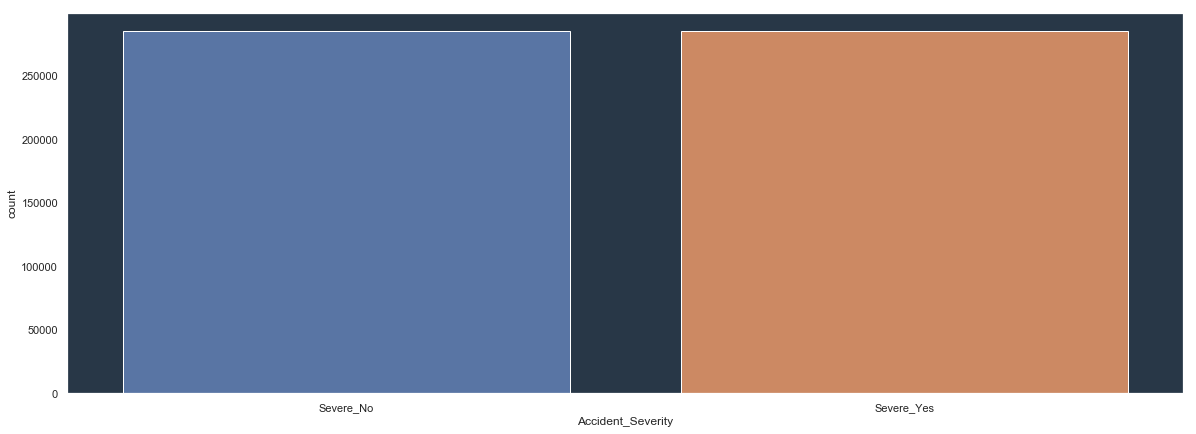

In [87]:
# visualise the individual record columns 
# we can use the chi-square test to evaluate the most important categorical features.
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Accident_Severity'] , order=normalized_df['Accident_Severity'].value_counts().index)
plt.show()

<Figure size 720x1440 with 0 Axes>

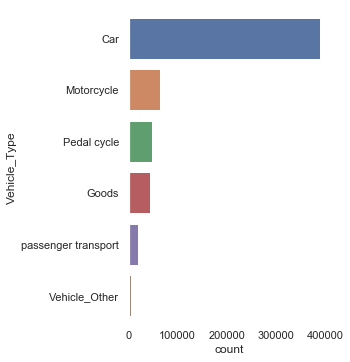

In [88]:
plt.figure(figsize=(10,20))
sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
sns.catplot(y = "Vehicle_Type", kind = "count",data = normalized_df , order=normalized_df['Vehicle_Type'].value_counts().index)
plt.show()

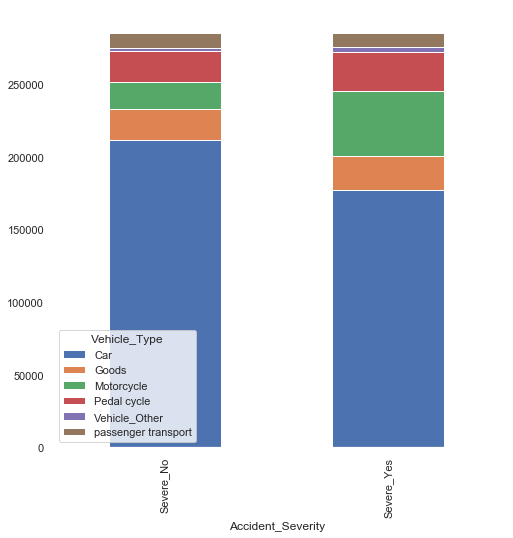

In [89]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Vehicle_Type"])


sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

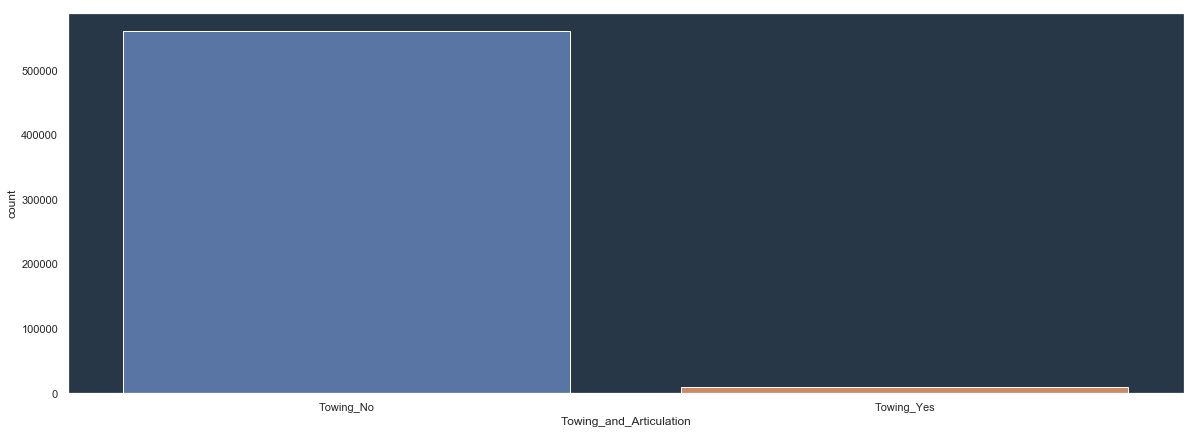

In [90]:
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Towing_and_Articulation'] , order=normalized_df['Towing_and_Articulation'].value_counts().index)
plt.show()

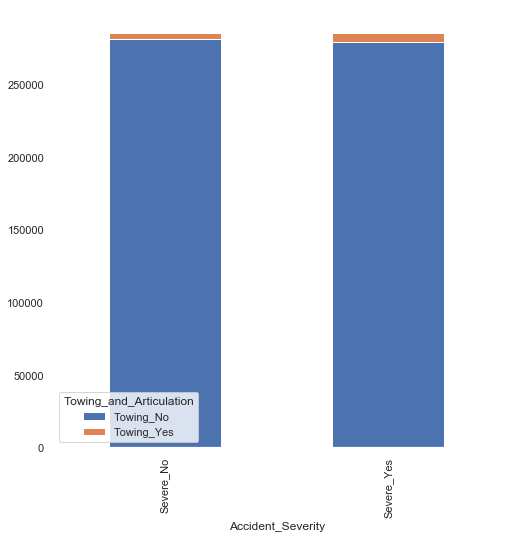

In [91]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Towing_and_Articulation"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

<Figure size 720x1440 with 0 Axes>

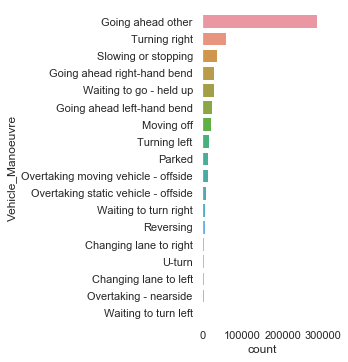

In [92]:
plt.figure(figsize=(10,20))
sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
sns.catplot(y = "Vehicle_Manoeuvre", kind = "count",data = normalized_df , order=normalized_df['Vehicle_Manoeuvre'].value_counts().index)
plt.show()

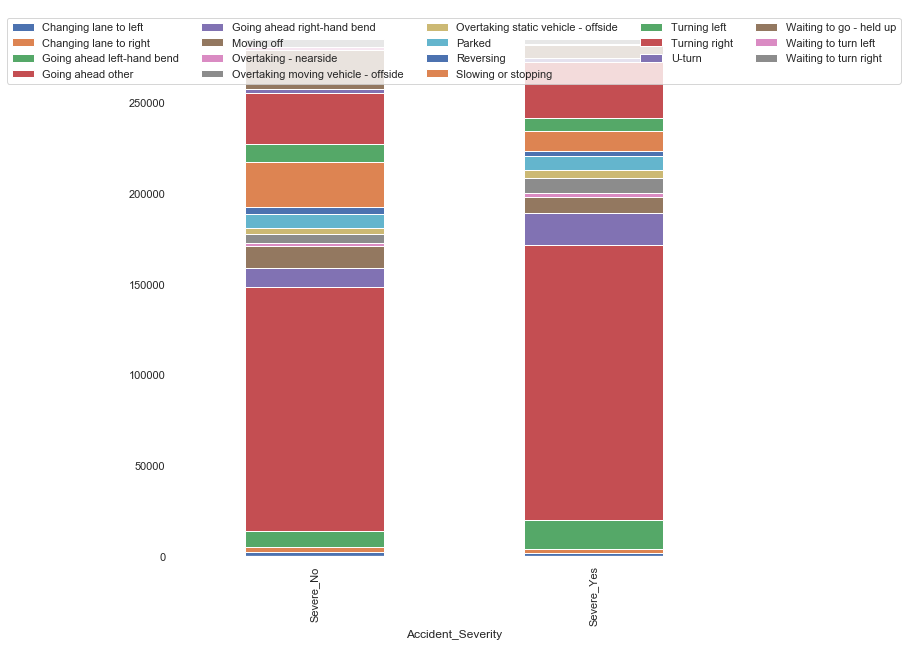

In [93]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Vehicle_Manoeuvre"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)
plt.legend(loc=9, ncol=5)

<Figure size 720x1440 with 0 Axes>

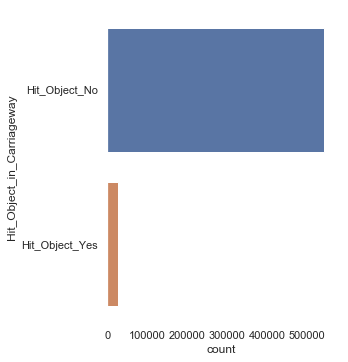

In [94]:
plt.figure(figsize=(10,20))
sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
sns.catplot(y = "Hit_Object_in_Carriageway", kind = "count",data = normalized_df , order=normalized_df['Hit_Object_in_Carriageway'].value_counts().index)
plt.show()

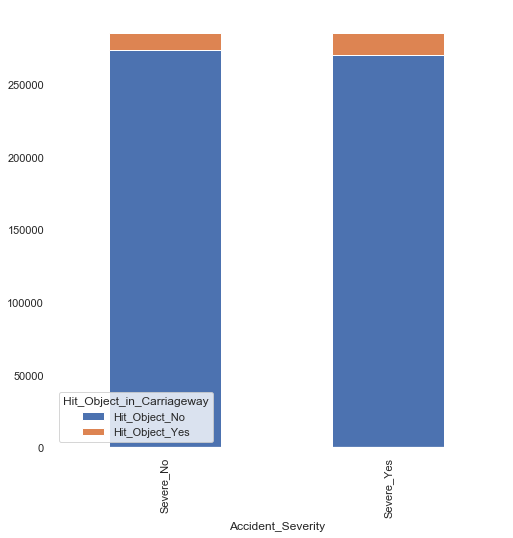

In [95]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Hit_Object_in_Carriageway"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

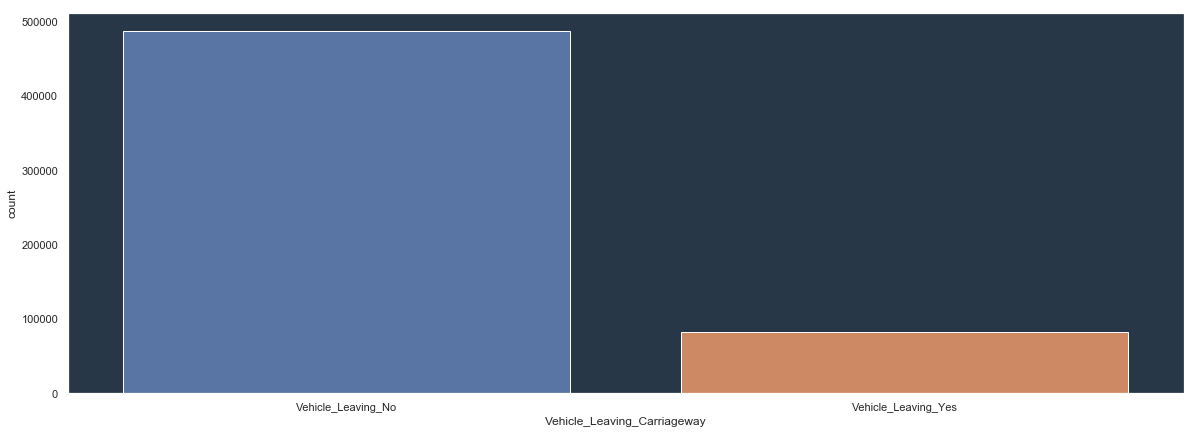

In [96]:
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Vehicle_Leaving_Carriageway'] , order=normalized_df['Vehicle_Leaving_Carriageway'].value_counts().index)
plt.show()

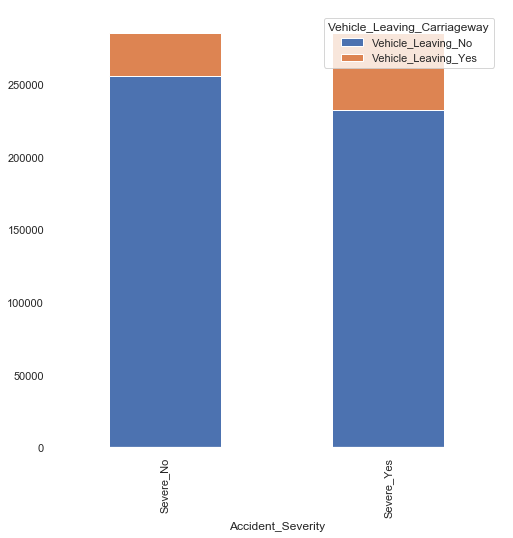

In [97]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Vehicle_Leaving_Carriageway"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

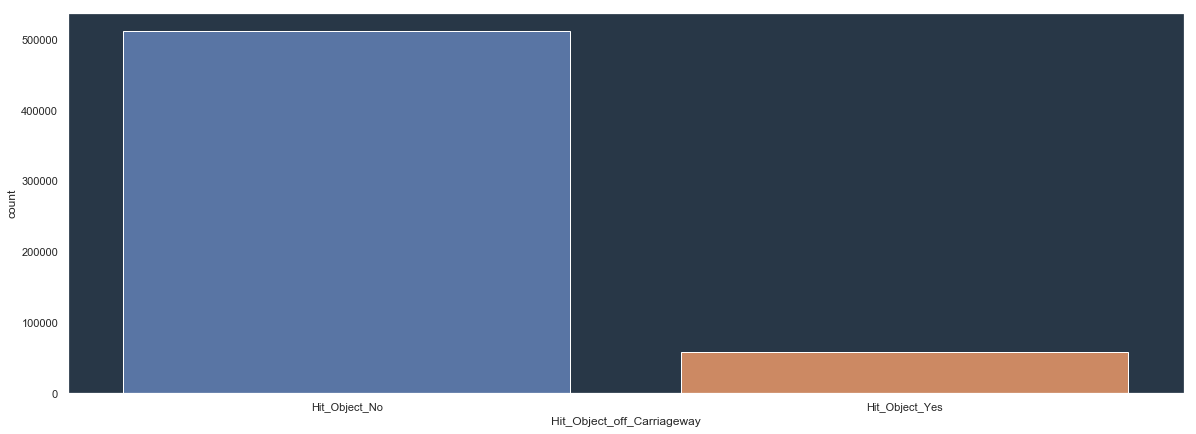

In [98]:
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Hit_Object_off_Carriageway'] , order=normalized_df['Hit_Object_off_Carriageway'].value_counts().index)
plt.show()

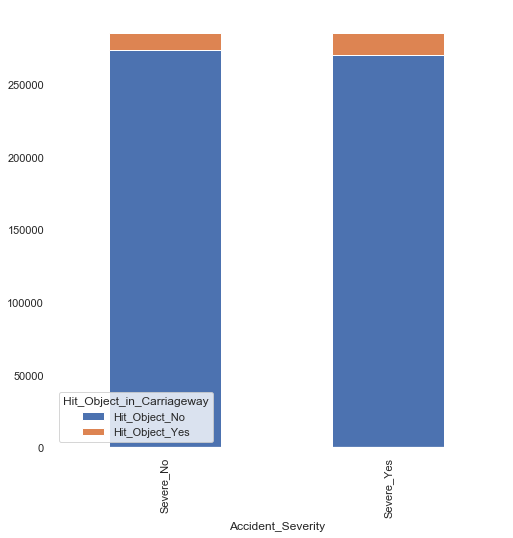

In [99]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Hit_Object_in_Carriageway"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

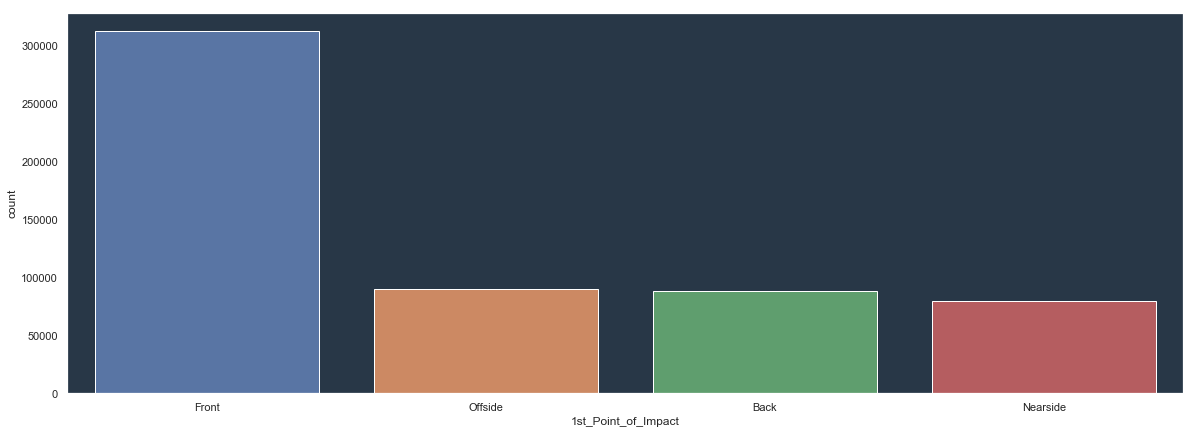

In [100]:
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['1st_Point_of_Impact'] , order=normalized_df['1st_Point_of_Impact'].value_counts().index)
plt.show()

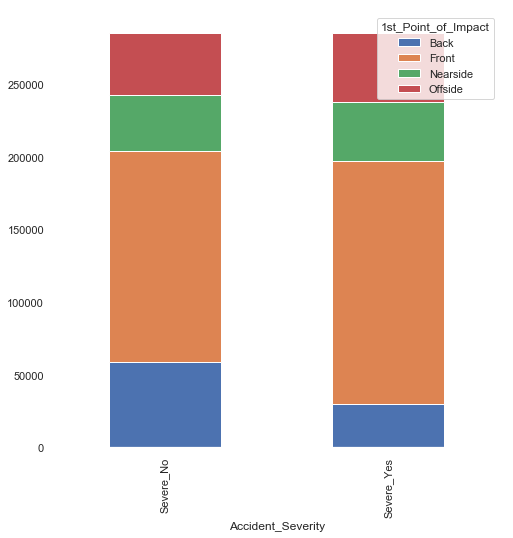

In [101]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["1st_Point_of_Impact"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

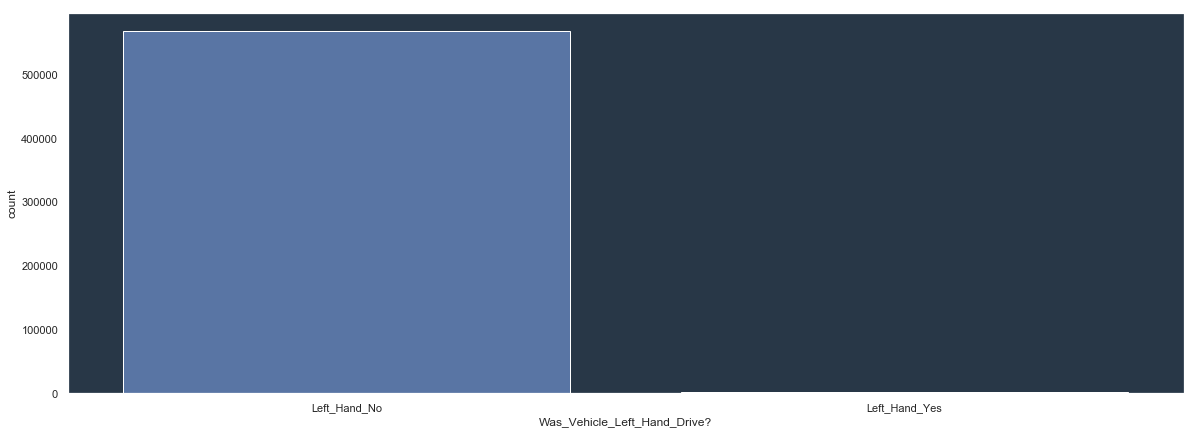

In [102]:
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Was_Vehicle_Left_Hand_Drive?'] , order=normalized_df['Was_Vehicle_Left_Hand_Drive?'].value_counts().index)
plt.show()

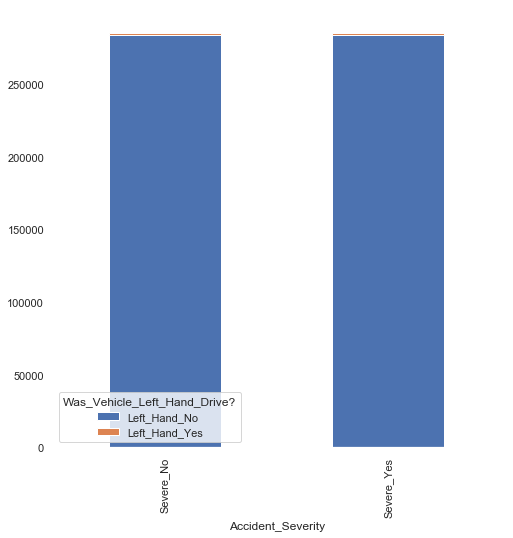

In [103]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Was_Vehicle_Left_Hand_Drive?"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

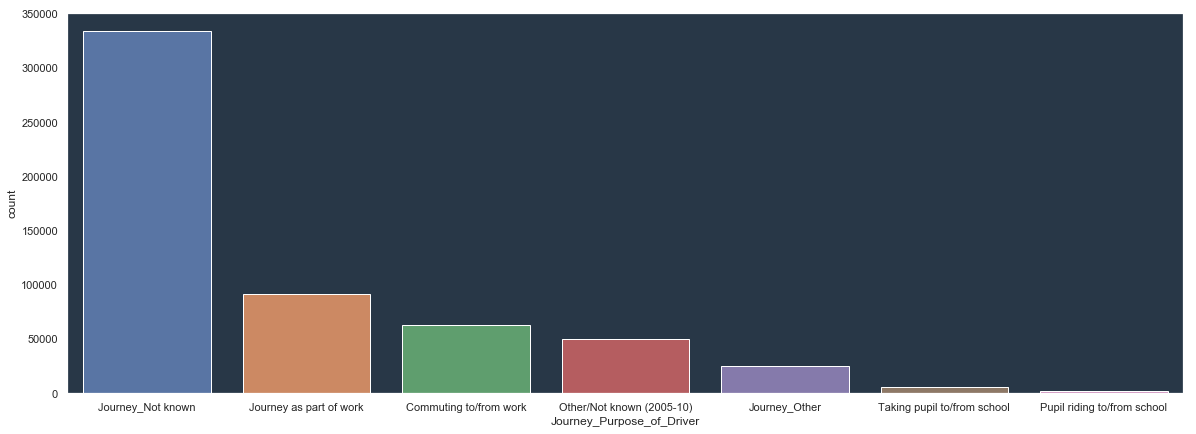

In [104]:
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Journey_Purpose_of_Driver'] , order=normalized_df['Journey_Purpose_of_Driver'].value_counts().index)
plt.show()

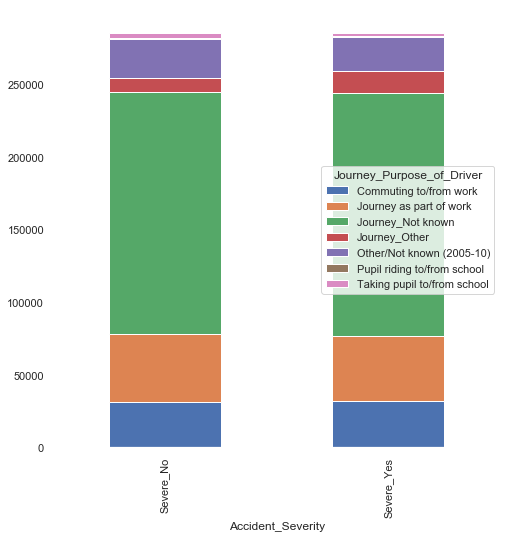

In [105]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Journey_Purpose_of_Driver"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

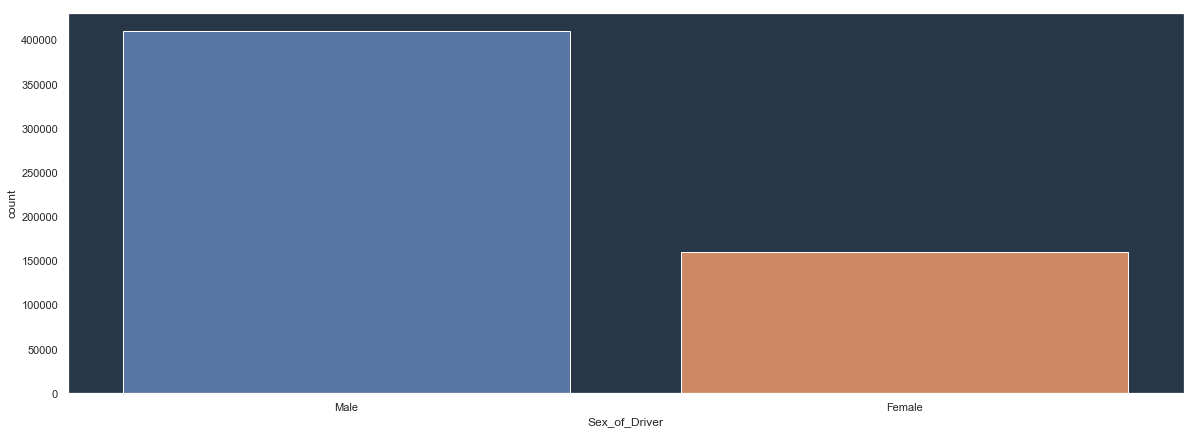

In [106]:
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Sex_of_Driver'] , order=normalized_df['Sex_of_Driver'].value_counts().index)
plt.show()

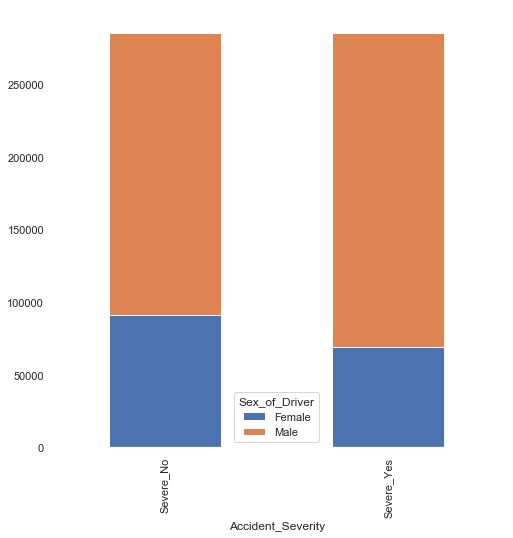

In [107]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Sex_of_Driver"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

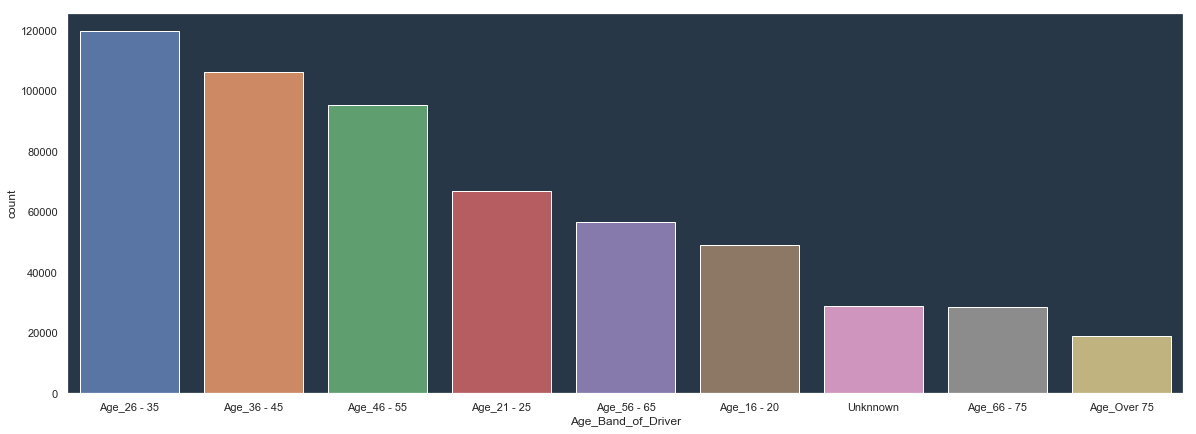

In [108]:
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Age_Band_of_Driver'] , order=normalized_df['Age_Band_of_Driver'].value_counts().index)
plt.show()

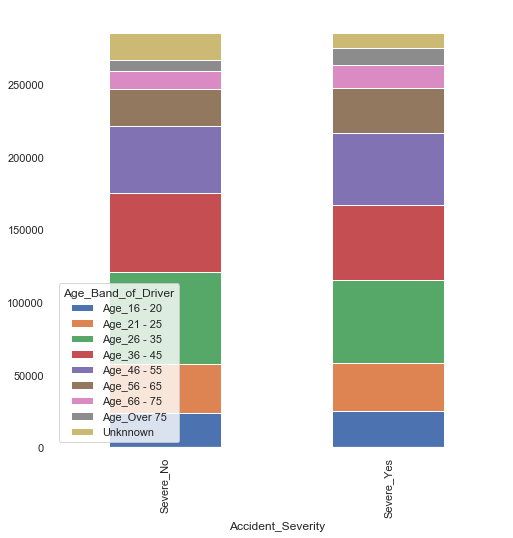

In [109]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Age_Band_of_Driver"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

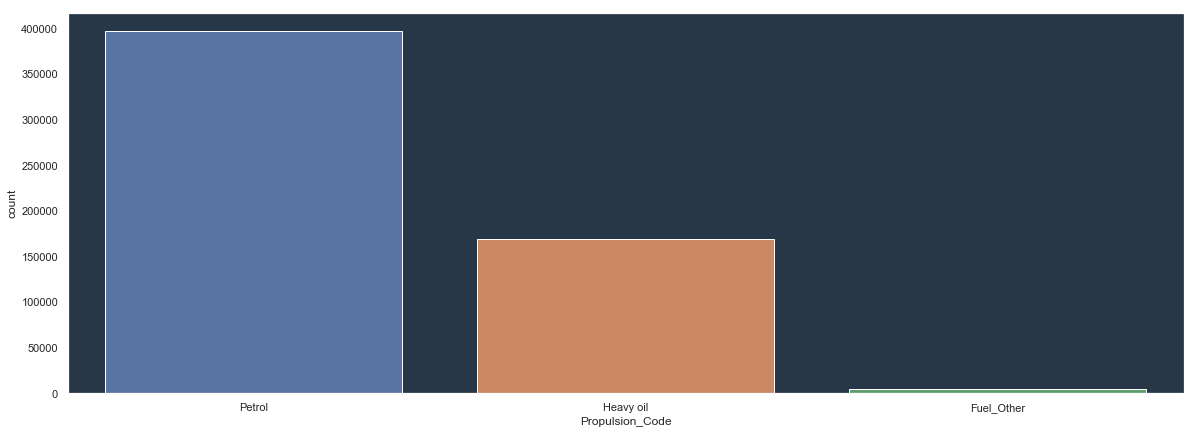

In [110]:
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Propulsion_Code'] , order=normalized_df['Propulsion_Code'].value_counts().index)
plt.show()

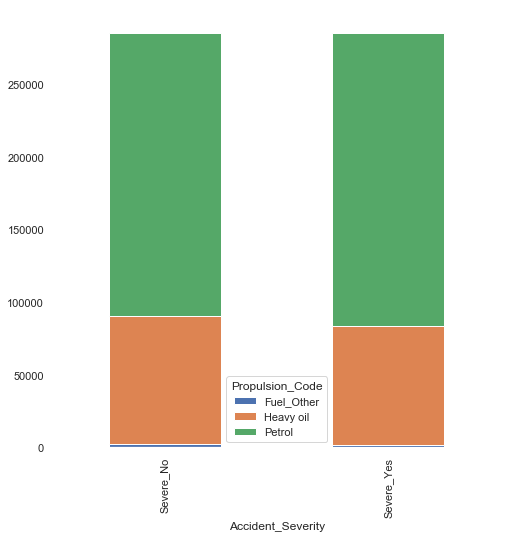

In [111]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Propulsion_Code"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

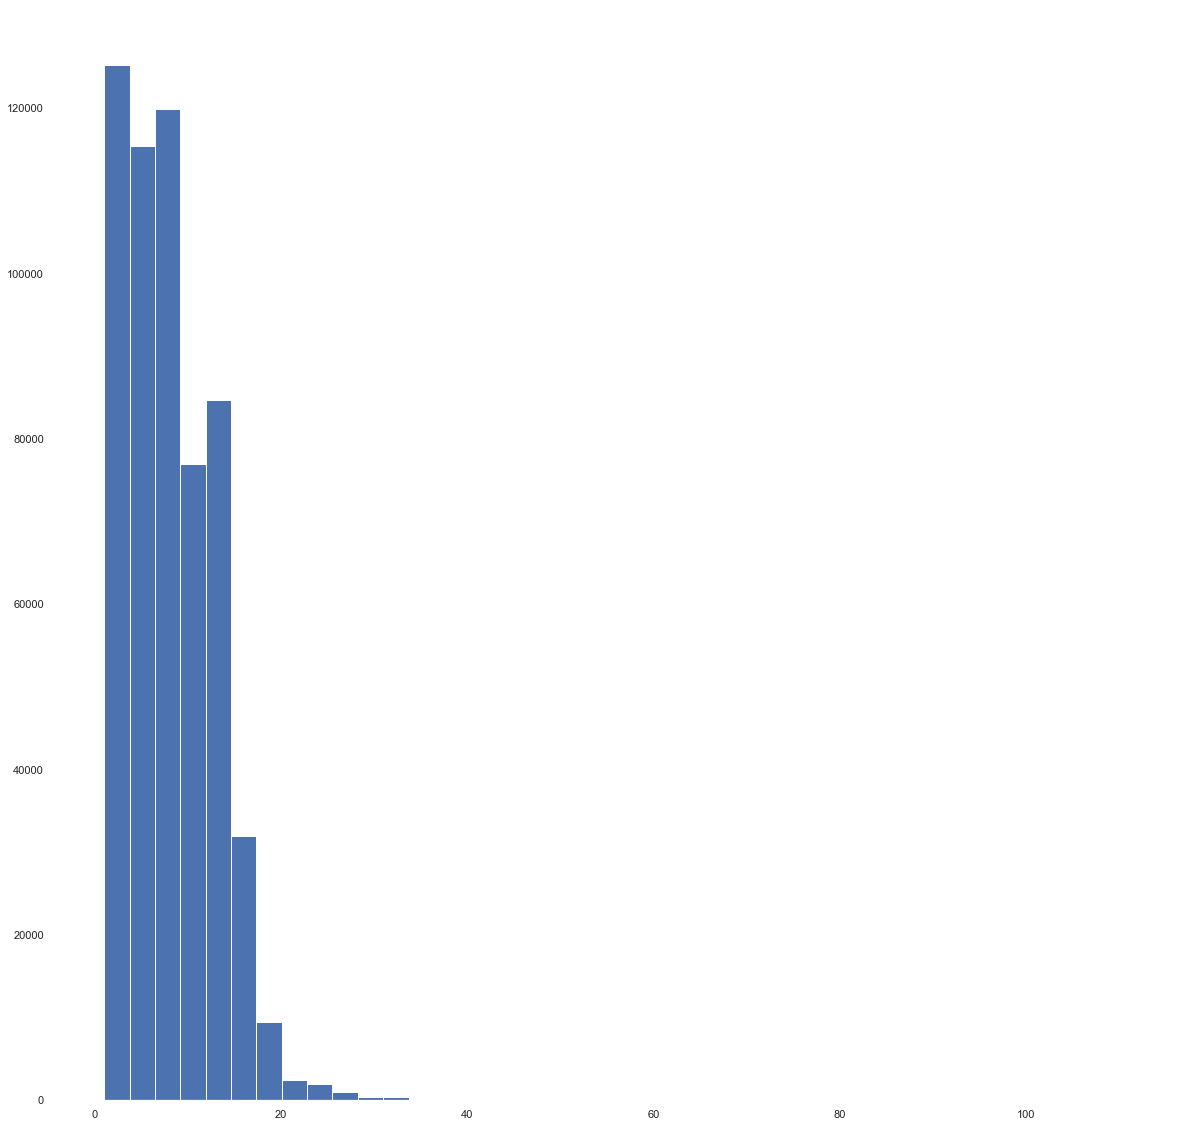

In [112]:
# plt.figure(figsize=(7,7))

normalized_df['Age_of_Vehicle'].hist(bins=40 , figsize=(20,20)) #Pandas Hist function
plt.show()

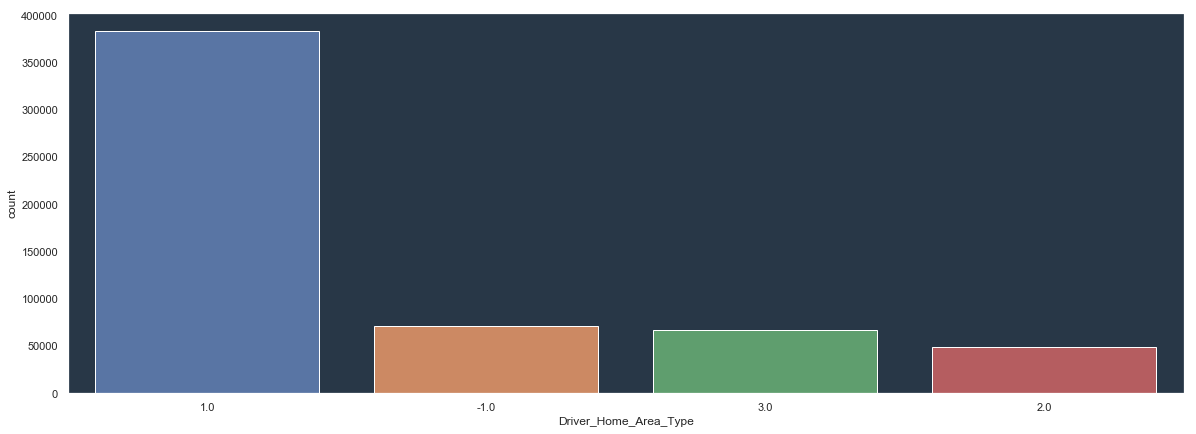

In [113]:
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Driver_Home_Area_Type'] , order=normalized_df['Driver_Home_Area_Type'].value_counts().index)
plt.show()

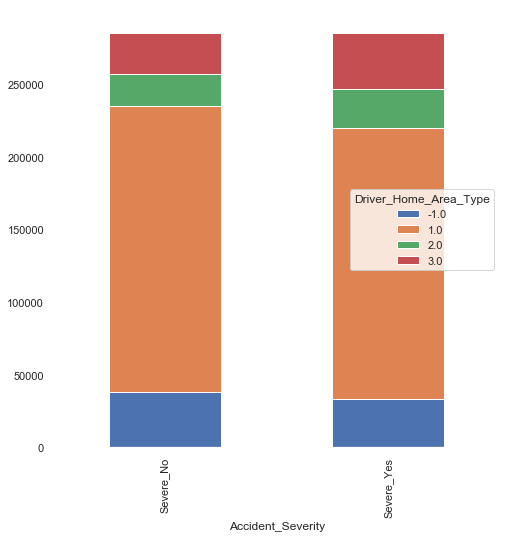

In [114]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Driver_Home_Area_Type"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

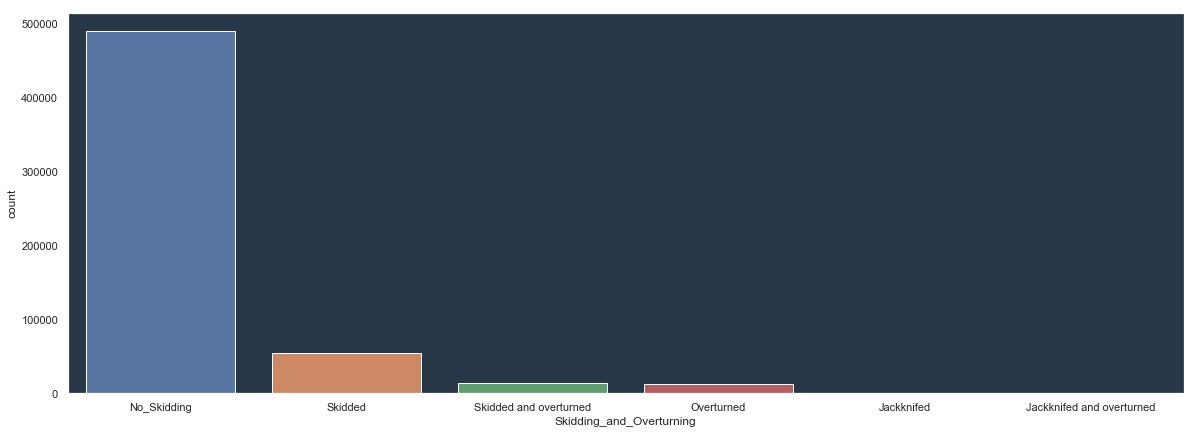

In [115]:
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Skidding_and_Overturning'] , order=normalized_df['Skidding_and_Overturning'].value_counts().index)
plt.show()

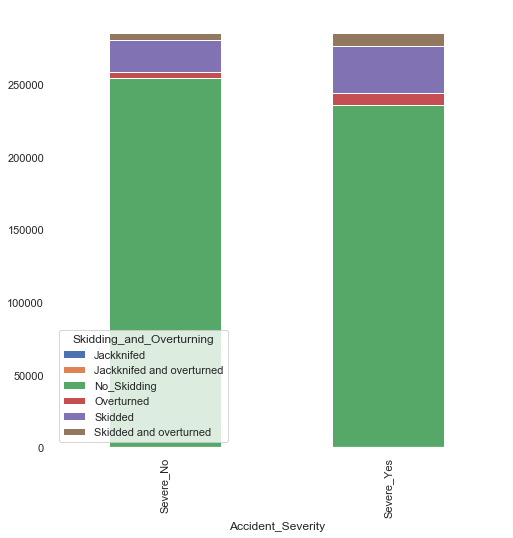

In [116]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Skidding_and_Overturning"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [117]:
# multiple records: Police_Force, Accident_Severity, Number_of_Vehicles, Number_of_Casualties, Date, Day_of_Week, Local_Authority_(Highway)
# vehicle reference will take maximum number for each accident index - won't be used for model building

# create the second data set that will group multiple records by accident index,
# create buckets for Engine_Capacity_(CC) and Age_of_Vehicle and create dummies
# create dummies for rest of the columns

# normalized_df[normalized_df['Number_of_Vehicles'] == 67]


dt = normalized_df[['Accident_Index', 'Accident_Severity', 'Time', 'Police_Force', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
                  'Local_Authority_(Highway)', '1st_Road_Class', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
                  'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
                  'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Junction_Location']]
# dt.shape # 570644
dt.drop_duplicates(inplace = True)
m = normalized_df.groupby('Accident_Index')['Vehicle_Reference'].max()
dt = dt.merge(m,on='Accident_Index')
m = normalized_df.groupby(['Accident_Index', 'Vehicle_Type'], as_index = False).size()
m = m.pivot(index = 'Accident_Index', columns = 'Vehicle_Type').fillna(0)
m.columns = m.columns.droplevel()
dt = dt.merge(m,on='Accident_Index')
m = pd.concat([normalized_df[['Accident_Index']],pd.get_dummies(normalized_df['Towing_and_Articulation']).drop(columns = 'Towing_No')], axis=1)
m.drop_duplicates(inplace = True)
dt = dt.merge(m,on='Accident_Index')
m = normalized_df.groupby(['Accident_Index', 'Vehicle_Manoeuvre'], as_index = False).size()
m = m.pivot(index = 'Accident_Index', columns = 'Vehicle_Manoeuvre').fillna(0)
m.columns = m.columns.droplevel()
dt = dt.merge(m,on='Accident_Index')
m = normalized_df.groupby(['Accident_Index', 'Skidding_and_Overturning'], as_index = False).size()
m = m.pivot(index = 'Accident_Index', columns = 'Skidding_and_Overturning').fillna(0)
m.columns = m.columns.droplevel()
dt = dt.merge(m,on='Accident_Index')
m = normalized_df.groupby(['Accident_Index', '1st_Point_of_Impact'], as_index = False).size()
m = m.pivot(index = 'Accident_Index', columns = '1st_Point_of_Impact').fillna(0)
m.columns = m.columns.droplevel()
dt = dt.merge(m,on='Accident_Index')
m = normalized_df.groupby(['Accident_Index', 'Journey_Purpose_of_Driver'], as_index = False).size()
m = m.pivot(index = 'Accident_Index', columns = 'Journey_Purpose_of_Driver').fillna(0)
m.columns = m.columns.droplevel()
dt = dt.merge(m,on='Accident_Index')
m = normalized_df.groupby(['Accident_Index', 'Journey_Purpose_of_Driver'], as_index = False).size()
m = m.pivot(index = 'Accident_Index', columns = 'Journey_Purpose_of_Driver').fillna(0)
m.columns = m.columns.droplevel()
dt = dt.merge(m,on='Accident_Index')
m = normalized_df.groupby(['Accident_Index', 'Age_Band_of_Driver'], as_index = False).size()
m = m.pivot(index = 'Accident_Index', columns = 'Age_Band_of_Driver').fillna(0)
m.columns = m.columns.droplevel()
dt = dt.merge(m,on='Accident_Index')
m = normalized_df.groupby(['Accident_Index', 'Sex_of_Driver'], as_index = False).size()
m = m.pivot(index = 'Accident_Index', columns = 'Sex_of_Driver').fillna(0)
m.columns = m.columns.droplevel()
dt = dt.merge(m,on='Accident_Index')
m = normalized_df.groupby(['Accident_Index', 'Propulsion_Code'], as_index = False).size()
m = m.pivot(index = 'Accident_Index', columns = 'Propulsion_Code').fillna(0)
m.columns = m.columns.droplevel()
dt = dt.merge(m,on='Accident_Index')


print(dt.shape)
print(dt.columns)

# Individual record:
# , Was_Vehicle_Left_Hand_Drive?
# , Engine_Capacity_(CC), Age_of_Vehicle,Driver_Home_Area_Type

C:\Users\fajlh\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


(474174, 89)
Index(['Accident_Index', 'Accident_Severity', 'Time', 'Police_Force',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(Highway)', '1st_Road_Class', 'Road_Type',
       'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Location', 'Vehicle_Reference', 'Car', 'Goods', 'Motorcycle',
       'Pedal cycle', 'Vehicle_Other', 'passenger transport', 'Towing_Yes',
       'Changing lane to left', 'Changing lane to right',
       'Going ahead left-hand bend', 'Going ahead other',
       'Going ahead right-hand bend', 'Moving off', 'Overtaking - nearside',
       'Overtaking moving vehicle - offs

In [118]:
# 'Vehicle_Location-Restricted_Lane', 'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway', 
# 'Was_Vehicle_Left_Hand_Drive?', ''

# Transform:Time - early morning (5 - 10), morning(10 - 15), afternoon(15 - 20), evening(20 - 24), night(24 - 5)
def time_to_num(time_str):
    hh, mm = map(str, time_str.split(':'))
    return hh + mm

# early morning (5 - 10), morning(10 - 15), afternoon(15 - 20), evening(20 - 24), night(24 - 5)
time1 = []
for i in dt['Time']:
    j = int(time_to_num(i))
    if j >= 500 and j < 1000:
        k = 'early_morning'
    elif j >= 1000 and j < 1500:
        k = 'morning'
    elif j >= 1500 and j < 2000:
        k = 'afternoon'
    elif j >= 2000 and j < 2400:
        k = 'evening'
    else:
        k = 'night'
    time1.append(k)
    
dt['Time'] = time1

# cut_labels_4 = ['new_car', 'average_car', 'old_car', 'antique_car']
# cut_bins = [0, 2, 5, 20, 120]
# normalized_df['Age_of_Vehicle'] = pd.cut(normalized_df['Age_of_Vehicle'], bins=cut_bins, labels=cut_labels_4)
m = normalized_df.groupby(['Accident_Index', 'Age_of_Vehicle'], as_index = False).size()
m = m.pivot(index = 'Accident_Index', columns = 'Age_of_Vehicle').fillna(0)
m.columns = m.columns.droplevel()
dt = dt.merge(m,on='Accident_Index')

m = normalized_df.groupby('Accident_Index')['Engine_Capacity_(CC)'].max()
dt = dt.merge(m,on='Accident_Index')

m = normalized_df.groupby(['Accident_Index', 'Driver_Home_Area_Type'], as_index = False).size()
m = m.pivot(index = 'Accident_Index', columns = 'Driver_Home_Area_Type').fillna(0)
m.columns = m.columns.droplevel()
dt = dt.merge(m,on='Accident_Index')
dt.rename(columns = {'1.0' : 'Area_1', '2.0' : 'Area_2', '3.0' : 'Area_3', '4.0':'Area_4'}, inplace = True)

print(dt.shape)
print(dt.columns)

(474174, 179)
Index([           'Accident_Index',         'Accident_Severity',
                            'Time',              'Police_Force',
              'Number_of_Vehicles',      'Number_of_Casualties',
                            'Date',               'Day_of_Week',
       'Local_Authority_(Highway)',            '1st_Road_Class',
       ...
                              91.0,                        99.0,
                             105.0,                       108.0,
                             110.0,      'Engine_Capacity_(CC)',
                              -1.0,                     '1.0_y',
                           '2.0_y',                     '3.0_y'],
      dtype='object', length=179)


In [120]:
import random

random.seed(30)

# Shuffle the Dataset.
shuffled_df = dt.sample(frac=1,random_state=4)

# Put all the severe class in a separate dataset.
severe_df = shuffled_df.loc[shuffled_df['Accident_Severity'] == "Severe_Yes"]

#Randomly select 350000 observations from the non-fraud (majority class)
non_severe_df = shuffled_df.loc[shuffled_df['Accident_Severity'] == "Severe_No"].sample(n=dt[dt['Accident_Severity'] == 'Severe_Yes'].shape[0],random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([severe_df, non_severe_df])
print(normalized_df.shape)

(416232, 179)


<Figure size 720x1440 with 0 Axes>

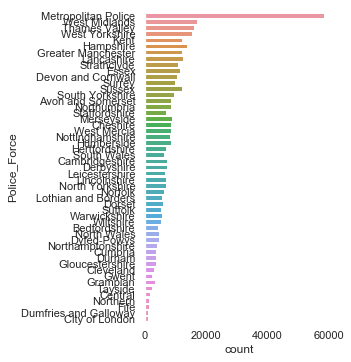

In [121]:
# Later on build random forest or xgboost model and see feature importance of each and every feature.
plt.figure(figsize=(10,20))
sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
sns.catplot(y = "Police_Force", kind = "count",data = normalized_df , order=data['Police_Force'].value_counts().index)
plt.show()

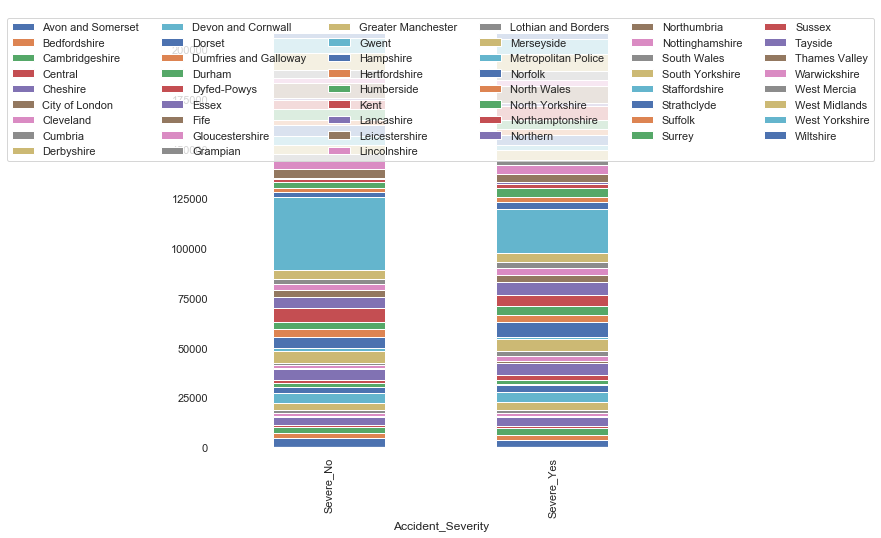

In [122]:
# We can also use permutation importance as well (eli5 package) for checking significance of features. Drop the features which are insignificant and rebuild the model.

clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Police_Force"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
plt.legend(loc=9, ncol=6)

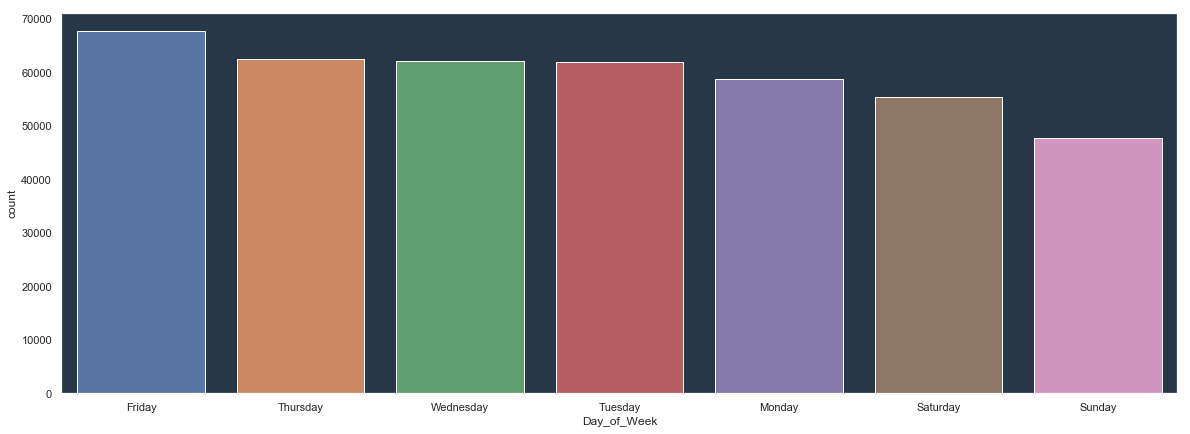

In [123]:
# we can use the chi-square test to evaluate the most important categorical features.
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Day_of_Week'] , order=dt['Day_of_Week'].value_counts().index)
plt.show()

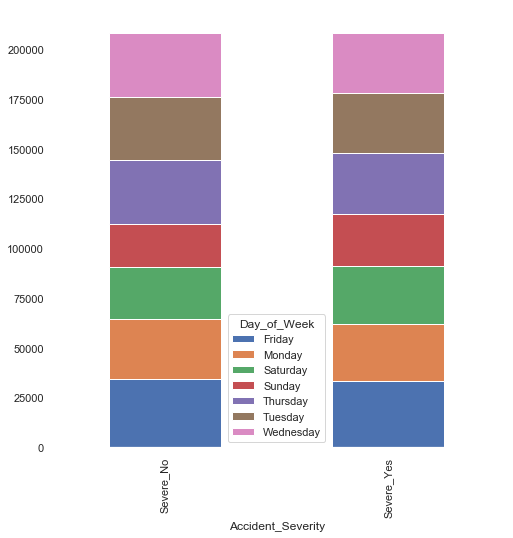

In [124]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Day_of_Week"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

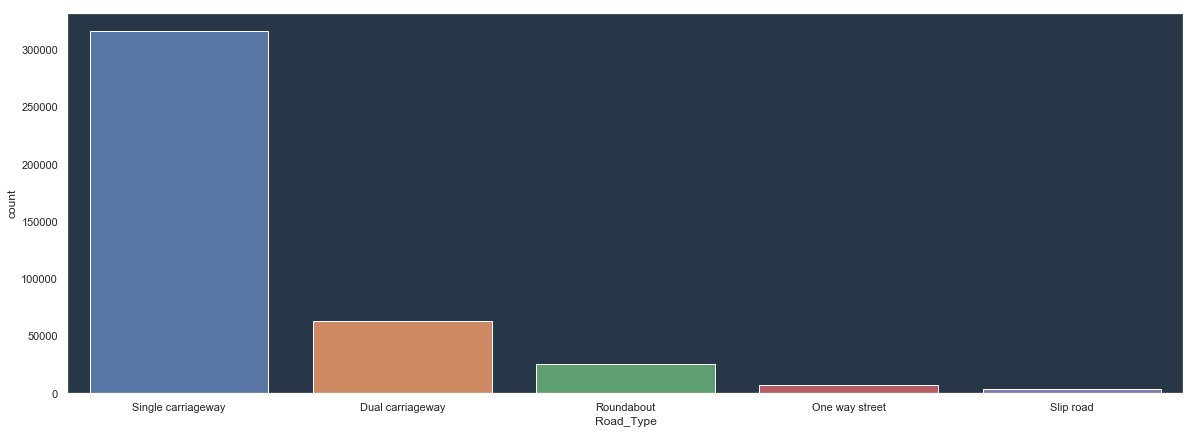

In [125]:
# we can use the chi-square test to evaluate the most important categorical features.
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Road_Type'] , order=normalized_df['Road_Type'].value_counts().index)
plt.show()

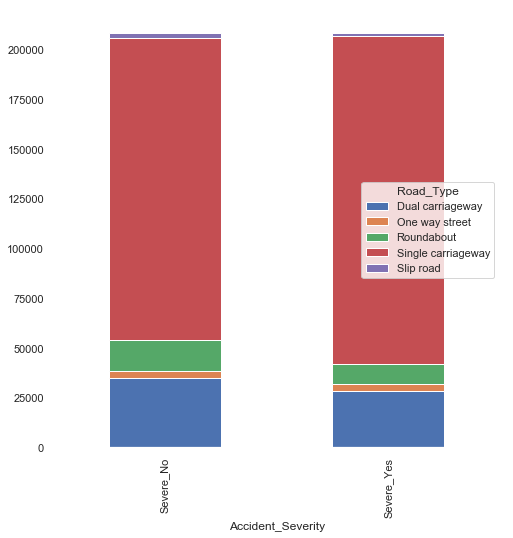

In [126]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Road_Type"])


sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

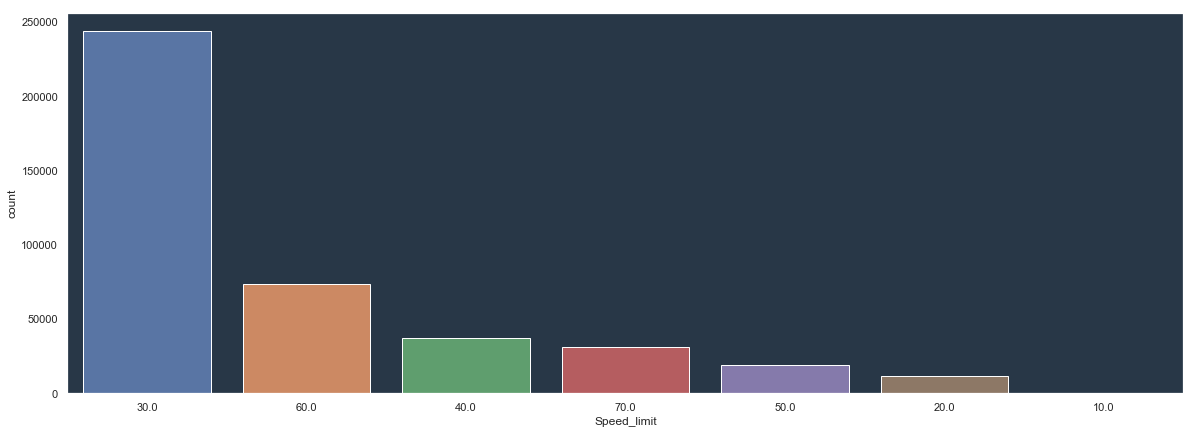

In [127]:
# we can use the chi-square test to evaluate the most important categorical features.
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Speed_limit'] , order=normalized_df['Speed_limit'].value_counts().index)
plt.show()

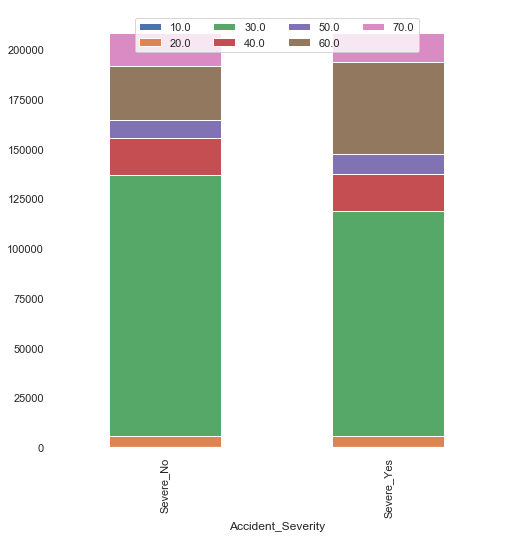

In [128]:
# We can also use permutation importance as well (eli5 package) for checking significance of features. Drop the features which are insignificant and rebuild the model.

clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Speed_limit"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
plt.legend(loc=9, ncol=4)

<Figure size 720x1440 with 0 Axes>

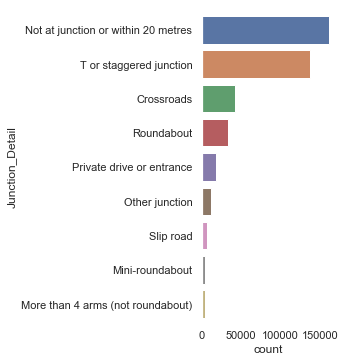

In [129]:
# we can use the chi-square test to evaluate the most important categorical features.
plt.figure(figsize=(10,20))
sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
sns.catplot(y = "Junction_Detail", kind = "count",data = normalized_df , order=data['Junction_Detail'].value_counts().index)
plt.show()

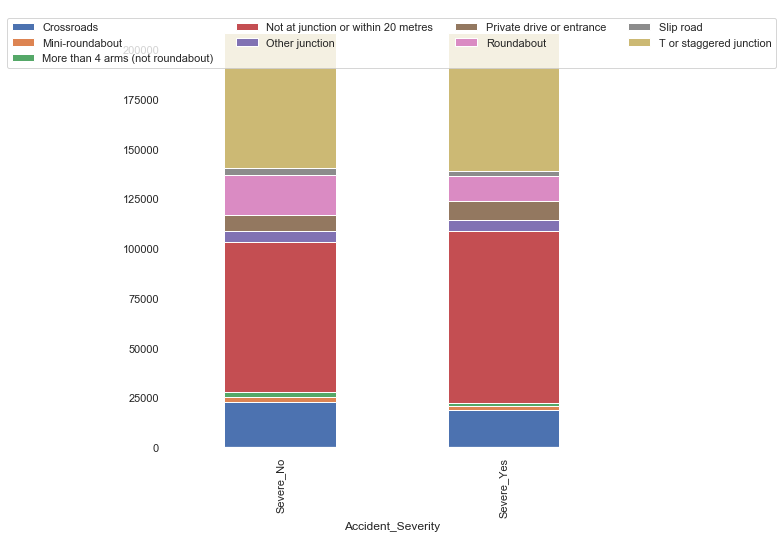

In [130]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Junction_Detail"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
plt.legend(loc=9, ncol=4)

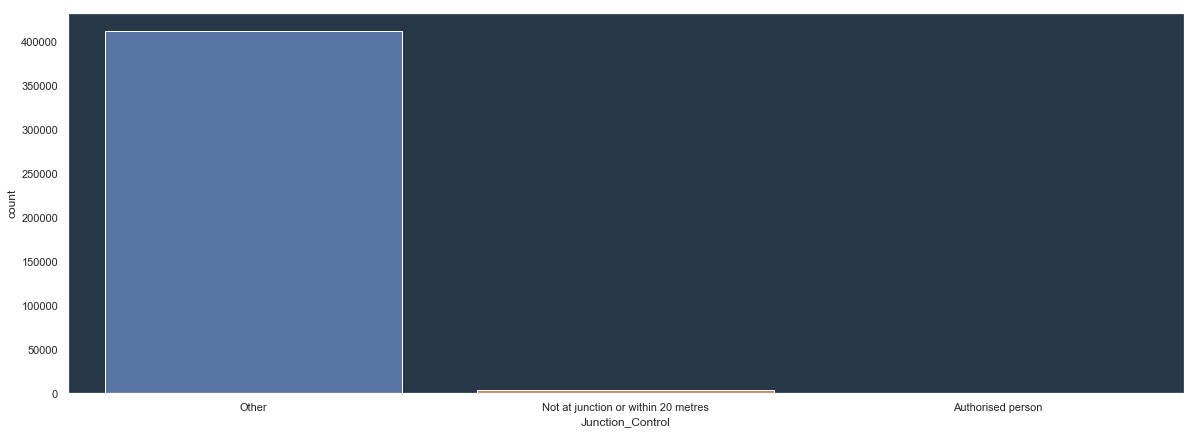

In [131]:
# we can use the chi-square test to evaluate the most important categorical features.
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Junction_Control'] , order=normalized_df['Junction_Control'].value_counts().index)
plt.show()

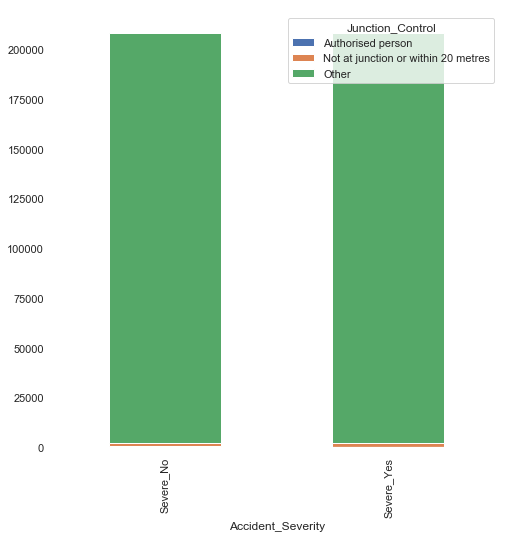

In [132]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Junction_Control"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

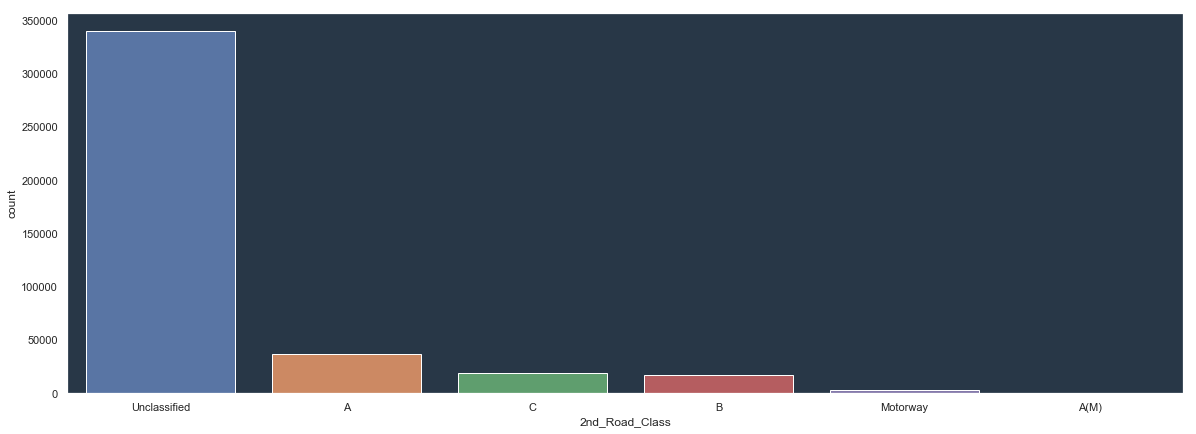

In [133]:
# Majority of 2nd road class is unclassified, I can remove this variable
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['2nd_Road_Class'] , order=normalized_df['2nd_Road_Class'].value_counts().index)
plt.show()

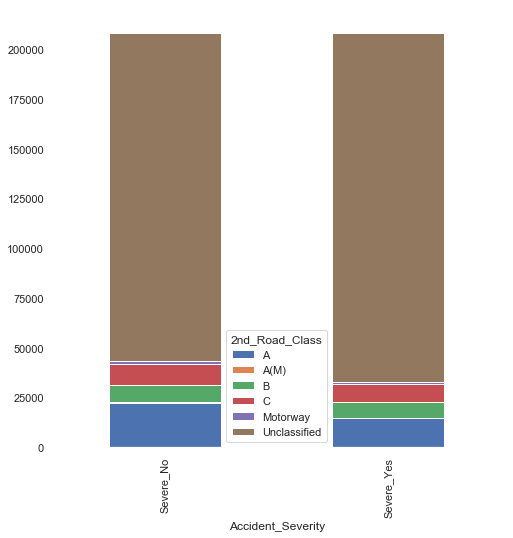

In [134]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["2nd_Road_Class"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

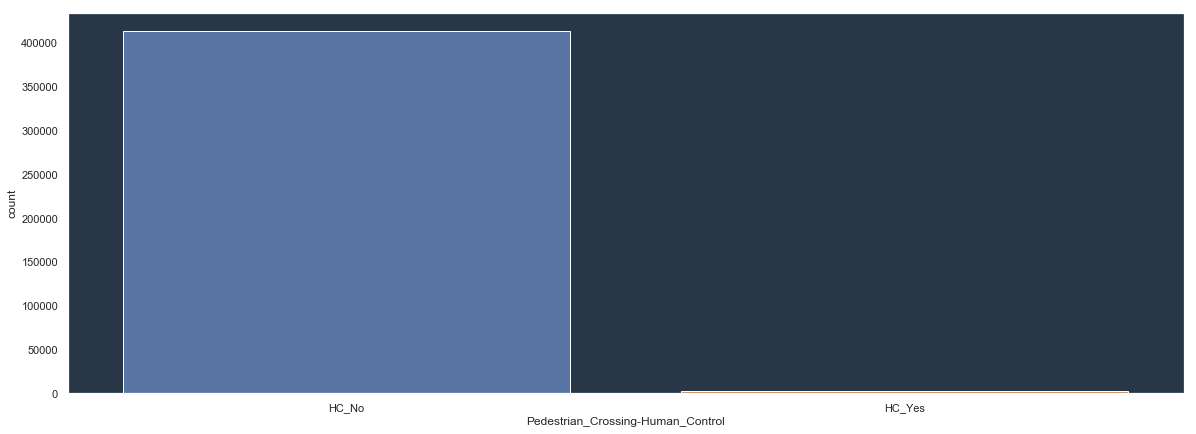

In [135]:
# Majority of variable is none within 50 metres, I can remove this column
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Pedestrian_Crossing-Human_Control'] , order=normalized_df['Pedestrian_Crossing-Human_Control'].value_counts().index)
plt.show()

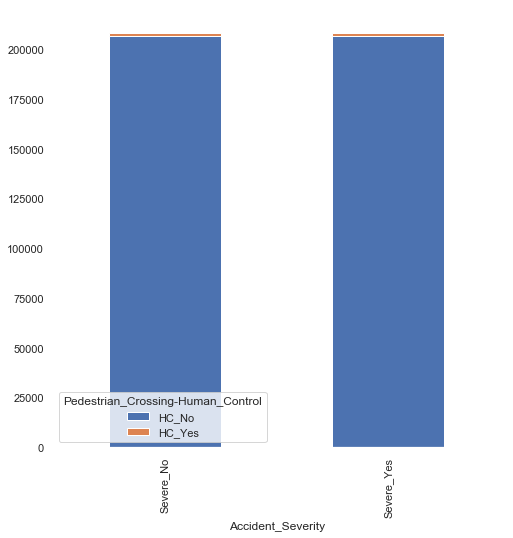

In [136]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Pedestrian_Crossing-Human_Control"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

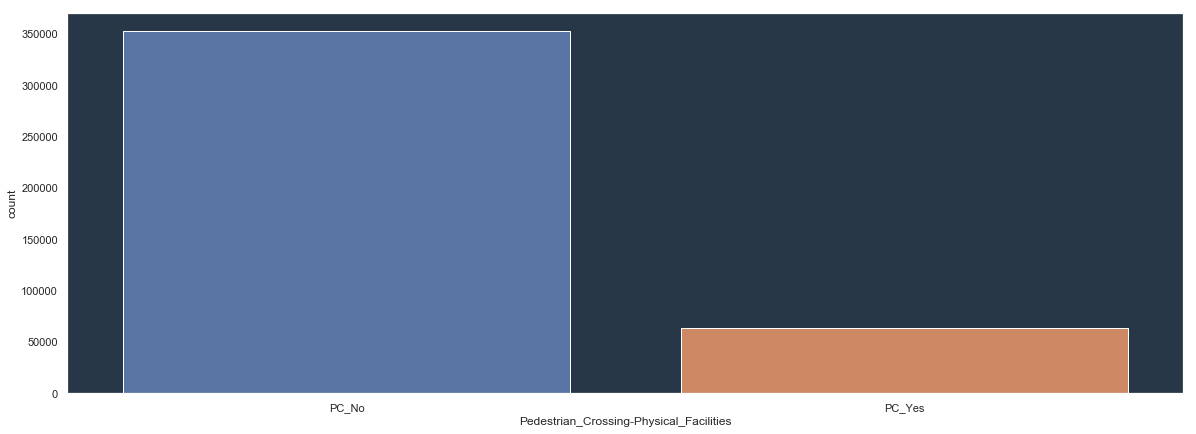

In [137]:
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Pedestrian_Crossing-Physical_Facilities'] , order=normalized_df['Pedestrian_Crossing-Physical_Facilities'].value_counts().index)
plt.show()

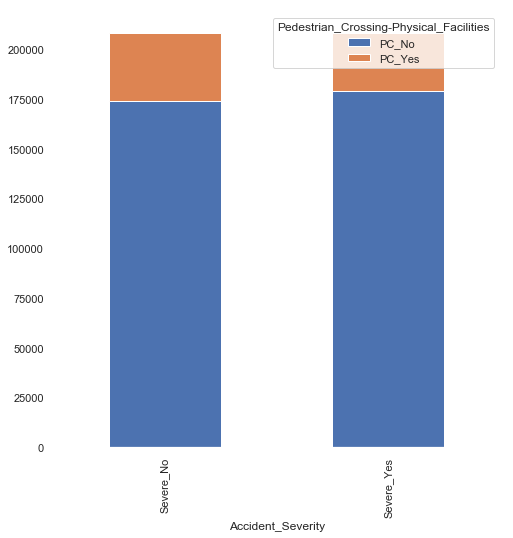

In [138]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Pedestrian_Crossing-Physical_Facilities"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

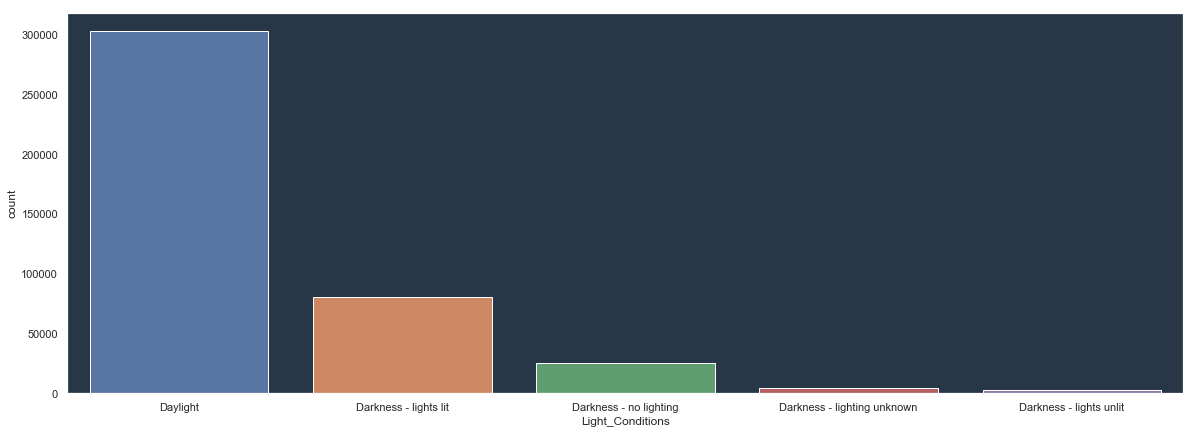

In [139]:
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Light_Conditions'] , order=normalized_df['Light_Conditions'].value_counts().index)
plt.show()

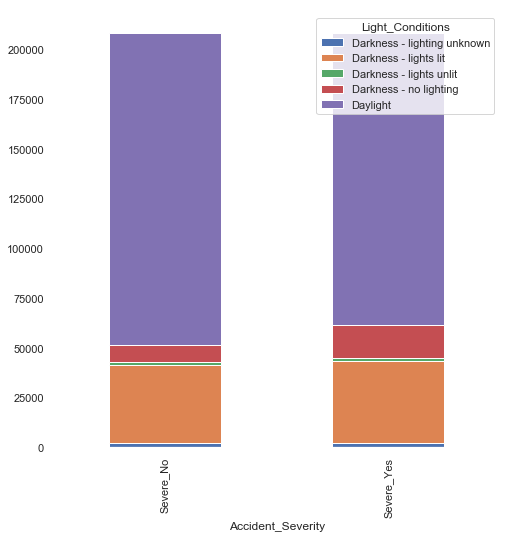

In [140]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Light_Conditions"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

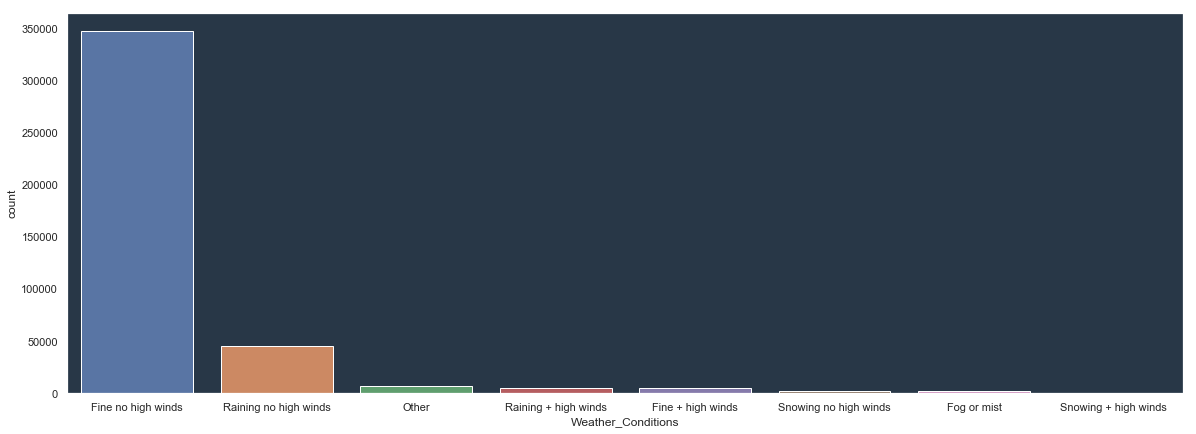

In [141]:
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Weather_Conditions'] , order=normalized_df['Weather_Conditions'].value_counts().index)
plt.show()

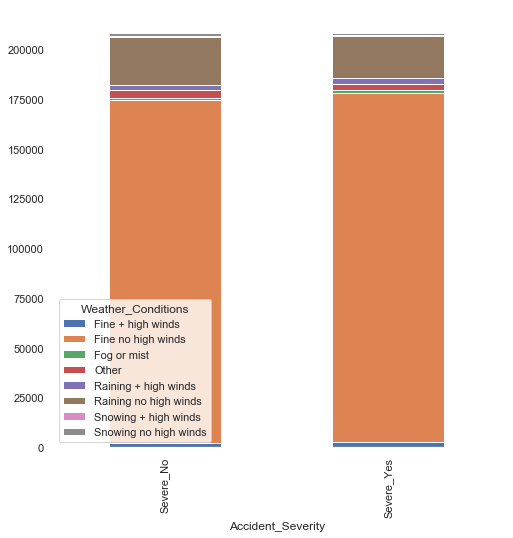

In [142]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Weather_Conditions"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

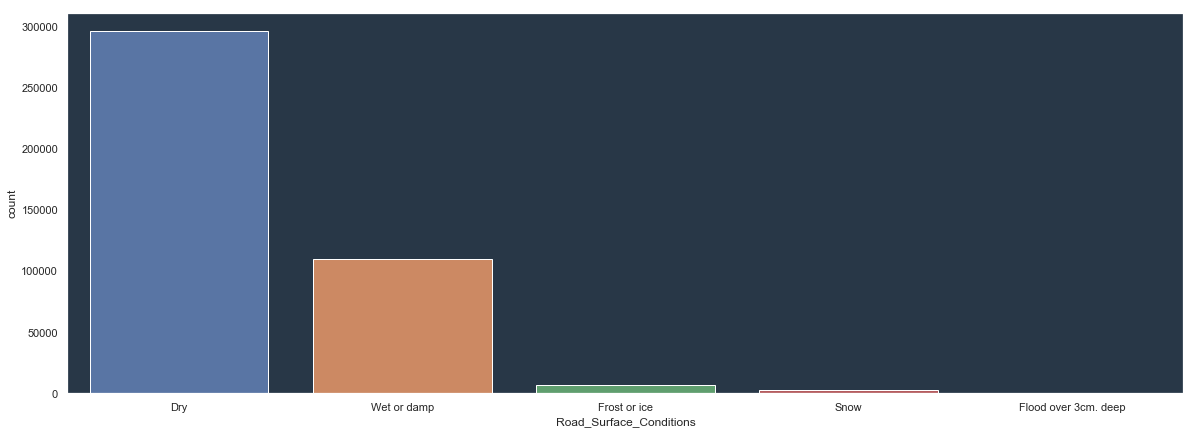

In [143]:
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Road_Surface_Conditions'] , order=normalized_df['Road_Surface_Conditions'].value_counts().index)
plt.show()

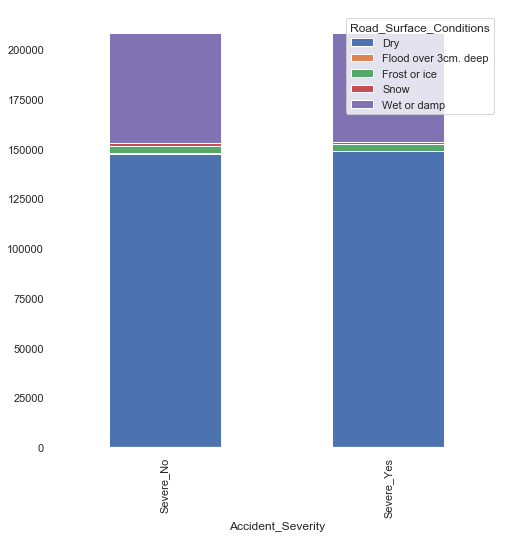

In [144]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Road_Surface_Conditions"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

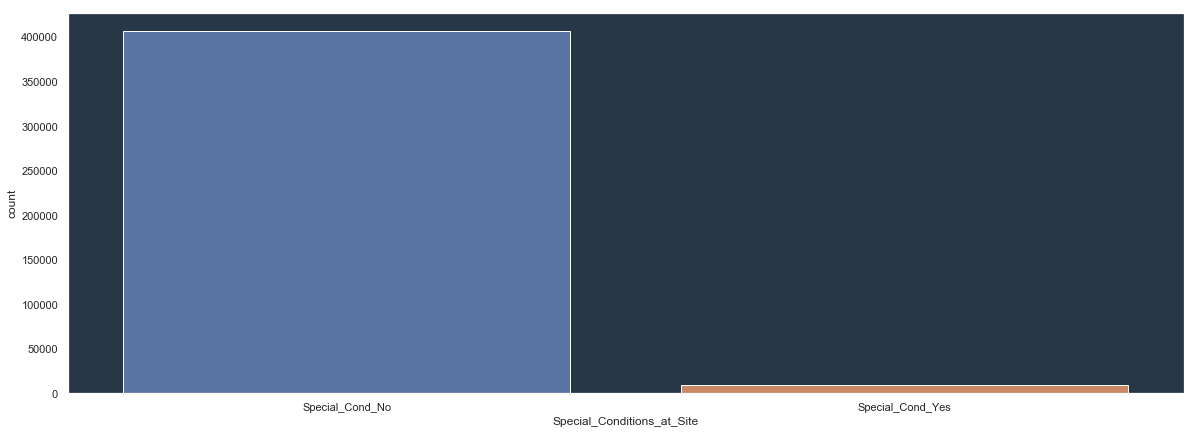

In [145]:
# You can remove this variable
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Special_Conditions_at_Site'] , order=normalized_df['Special_Conditions_at_Site'].value_counts().index)
plt.show()

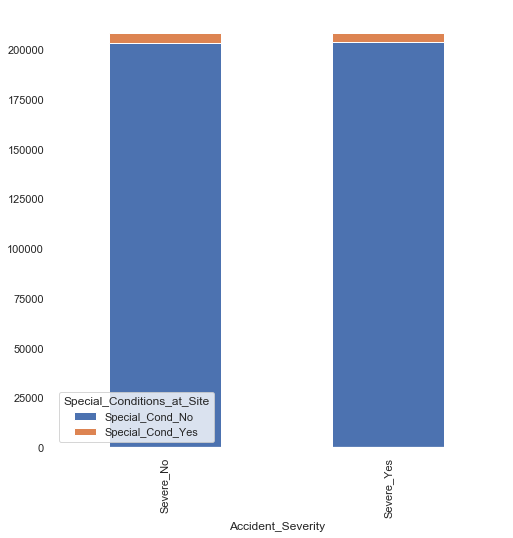

In [146]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Special_Conditions_at_Site"])


sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

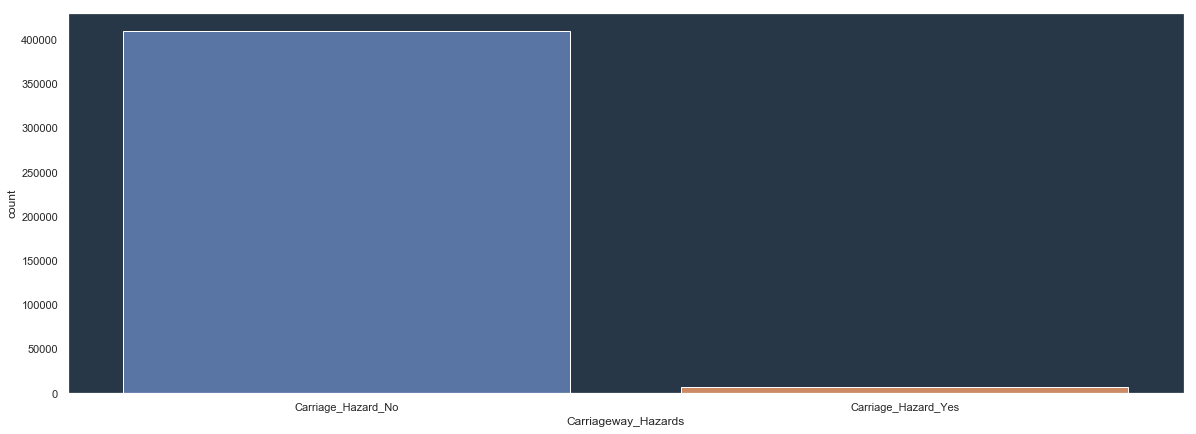

In [147]:
# You can remove this variable
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Carriageway_Hazards'] , order=normalized_df['Carriageway_Hazards'].value_counts().index)
plt.show()

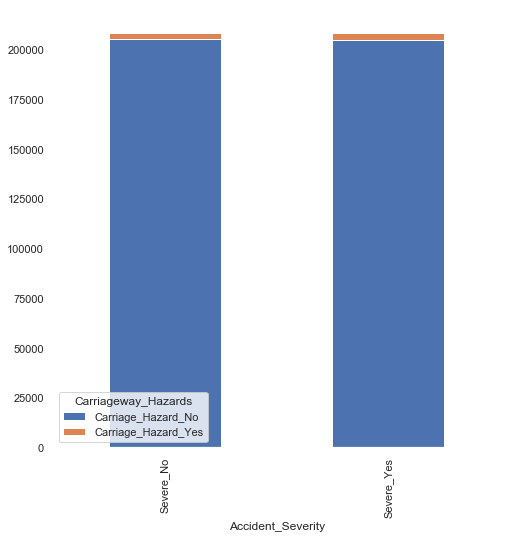

In [148]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Carriageway_Hazards"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

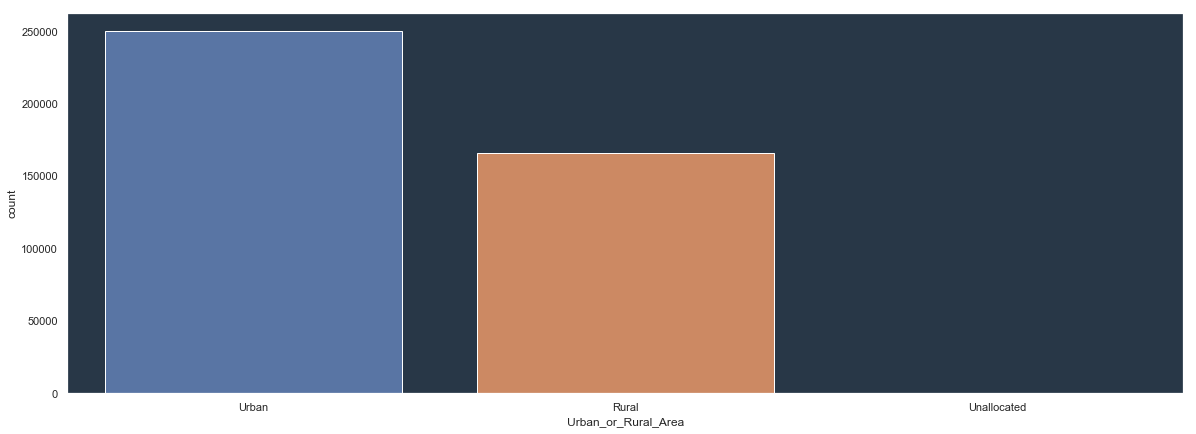

In [149]:
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Urban_or_Rural_Area'] , order=normalized_df['Urban_or_Rural_Area'].value_counts().index)
plt.show()

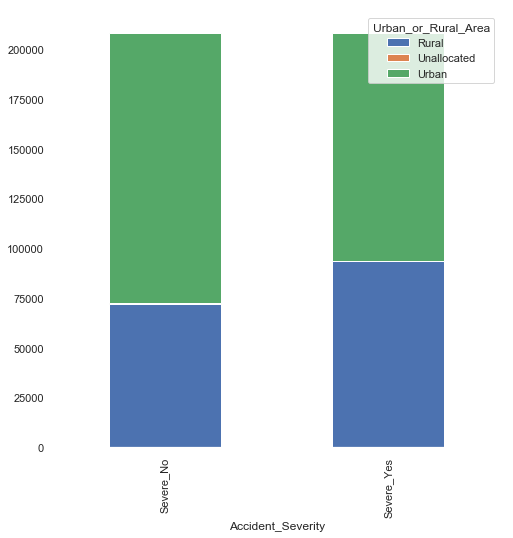

In [150]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Urban_or_Rural_Area"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

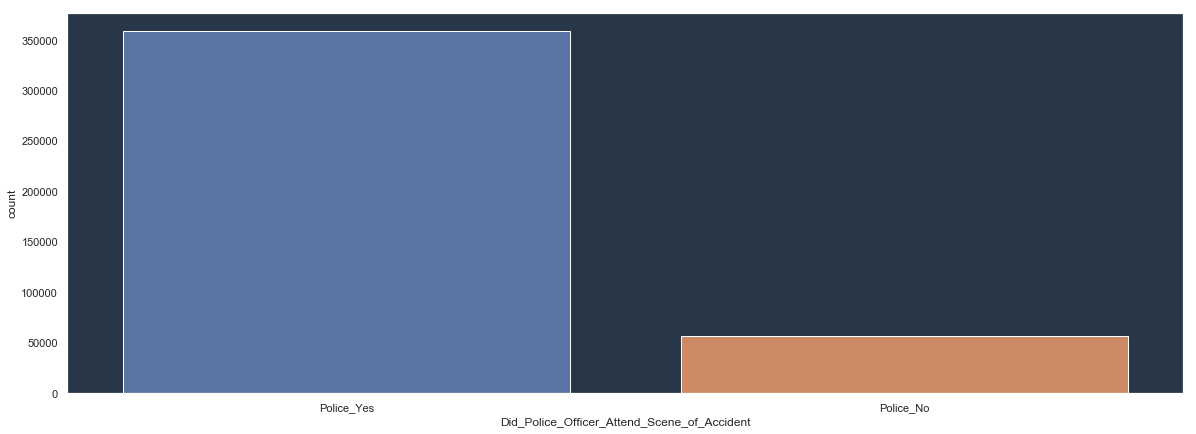

In [151]:
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Did_Police_Officer_Attend_Scene_of_Accident'] , order=normalized_df['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts().index)
plt.show()

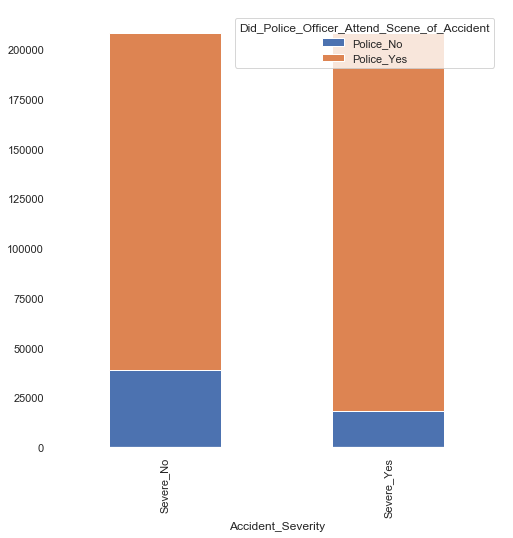

In [152]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Did_Police_Officer_Attend_Scene_of_Accident"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [153]:
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Vehicle_Location-Restricted_Lane'] , order=normalized_df['Vehicle_Location-Restricted_Lane'].value_counts().index)
plt.show()

KeyError: 'Vehicle_Location-Restricted_Lane'

<Figure size 1440x504 with 0 Axes>

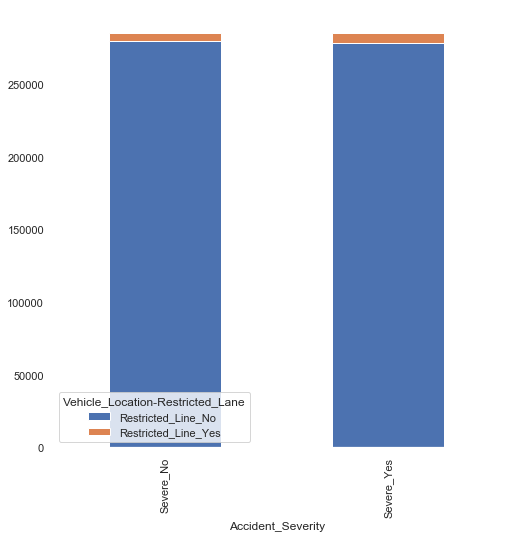

In [76]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Vehicle_Location-Restricted_Lane"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

<Figure size 720x1440 with 0 Axes>

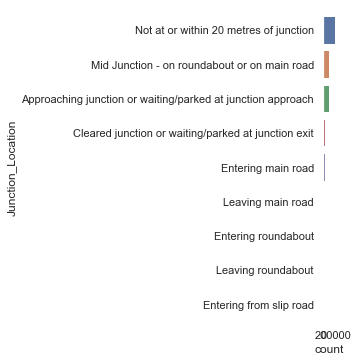

In [77]:
plt.figure(figsize=(10,20))
sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
sns.catplot(y = "Junction_Location", kind = "count",data = normalized_df , order=normalized_df['Junction_Location'].value_counts().index)
plt.show()

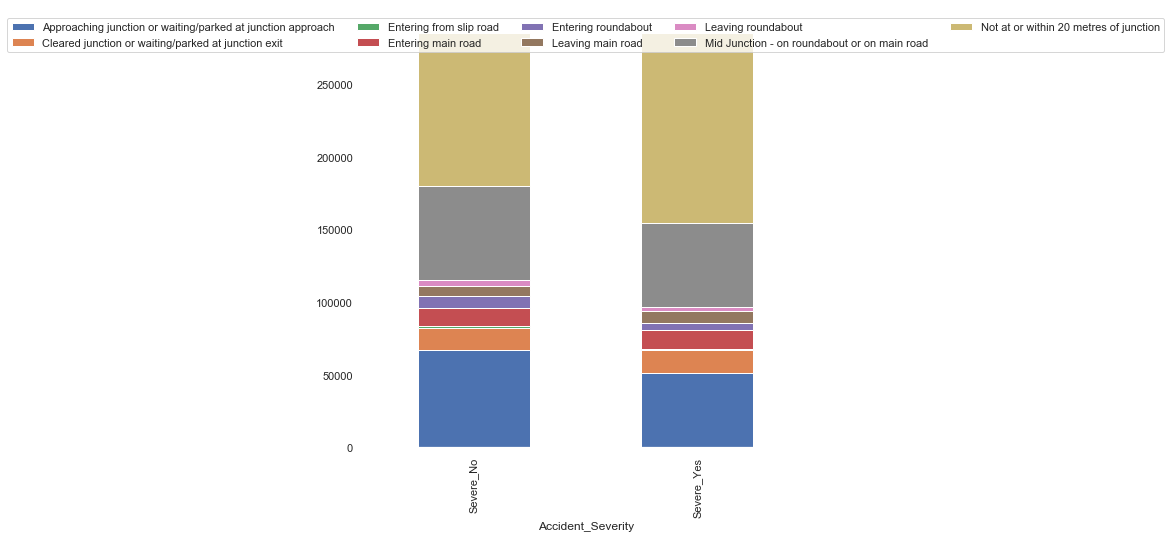

In [78]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Junction_Location"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
plt.legend(loc=9, ncol=5)

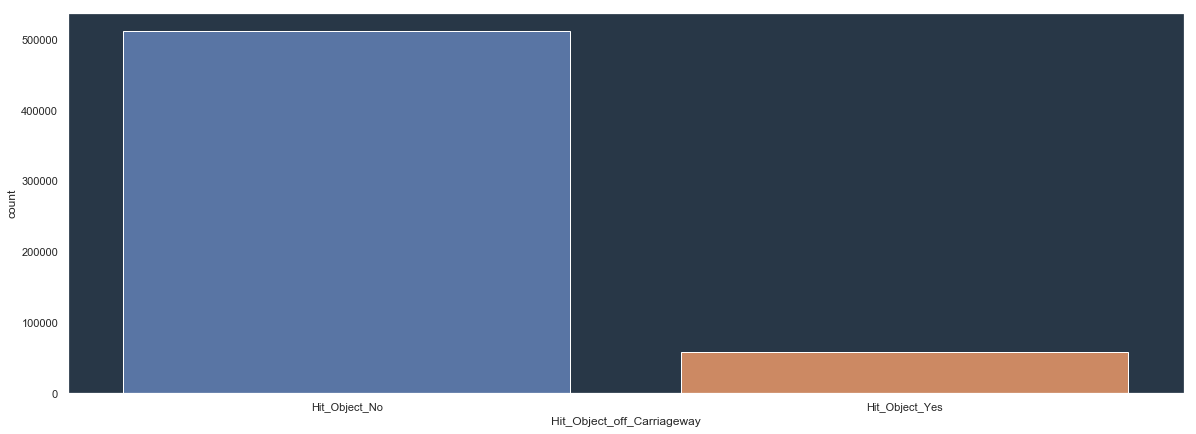

In [85]:
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['Hit_Object_off_Carriageway'] , order=normalized_df['Hit_Object_off_Carriageway'].value_counts().index)
plt.show()

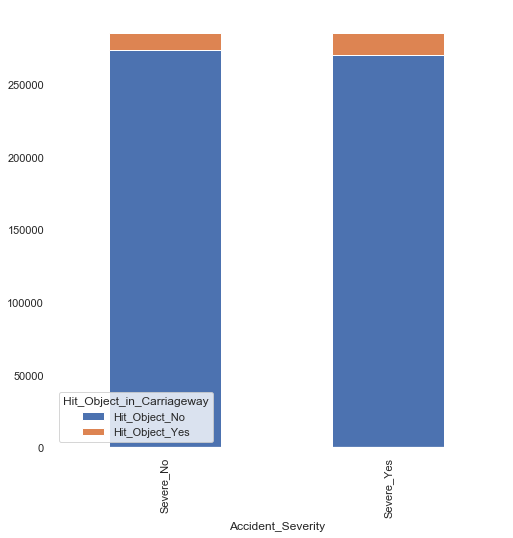

In [86]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["Hit_Object_in_Carriageway"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

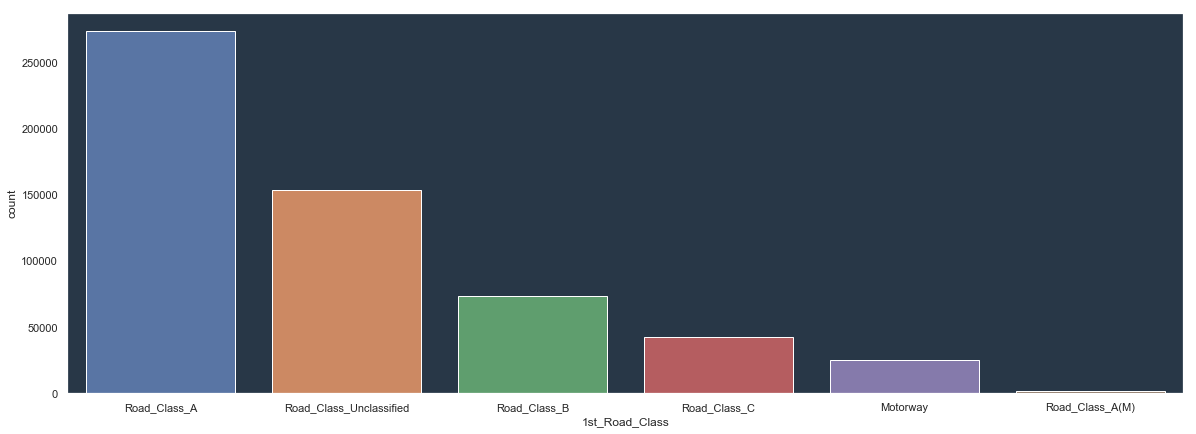

In [101]:
plt.figure(figsize=(20,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False})
sns.countplot(x=normalized_df['1st_Road_Class'] , order=normalized_df['1st_Road_Class'].value_counts().index)
plt.show()

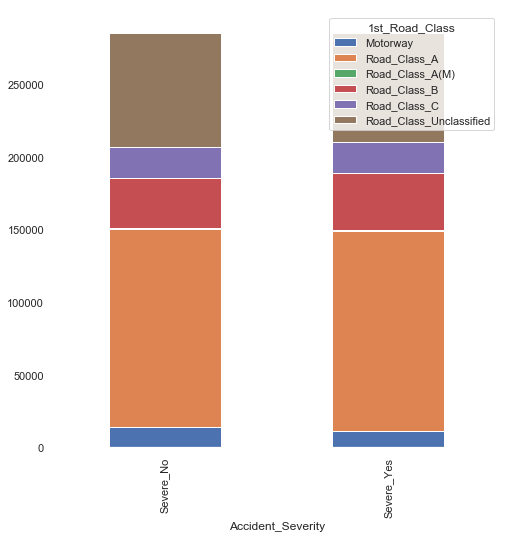

In [102]:
clarity_color_table = pd.crosstab(index=normalized_df["Accident_Severity"], 
                          columns=normalized_df["1st_Road_Class"])

sns.set(rc={"axes.facecolor":"white", "axes.grid":False})
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [104]:
model_df = normalized_df[['Police_Force', 'Day_of_Week', '1st_Road_Class', 'Road_Type', 'Speed_limit', 'Junction_Detail',
                         'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions',
                         'Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Junction_Location', 'Vehicle_Type', '1st_Point_of_Impact',
                         'Sex_of_Driver', 'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code', 'Age_of_Vehicle',
                         'Driver_Home_Area_Type']]
((model_df.isin([-1]).sum(axis=0) + pd.isnull(model_df).sum())/model_df.shape[0]) * 100
# To build the model I will use: 
# Accident_Severity, - labels

# Police_Force
# Day_of_Week, 
# 1st_Road_Class, 
# Road_Type, 
# Speed_limit, 
# Junction_Detail, 
# 2nd_Road_Class, 
# Pedestrian_Crossing-Physical_Facilities, 
# Light_Conditions, 
# Weather_Conditions, 
# Road_Surface_Conditions, 
# Urban_or_Rural_Area, 
# Junction_Location, 
# Vehicle_Type, 
# 1st_Point_of_Impact, 
# Sex_of_Driver, 
# Age_Band_of_Driver, 
# Engine_Capacity_(CC), 
# Propulsion_Code, 
# Age_of_Vehicle, 
# Driver_Home_Area_Type

# Age_Band_of_Driver,  Age_of_Vehicle, Driver_Home_Area_Type

Police_Force                                0.000000
Day_of_Week                                 0.000000
1st_Road_Class                              0.000000
Road_Type                                   0.000000
Speed_limit                                 0.000000
Junction_Detail                             0.000000
Pedestrian_Crossing-Physical_Facilities     0.000000
Light_Conditions                            0.000000
Weather_Conditions                          0.000000
Road_Surface_Conditions                     0.000000
Urban_or_Rural_Area                         0.000000
Junction_Location                           0.000000
Vehicle_Type                                0.000000
1st_Point_of_Impact                         0.000000
Sex_of_Driver                               0.000000
Age_Band_of_Driver                          0.000000
Engine_Capacity_(CC)                        0.000000
Propulsion_Code                             0.000000
Age_of_Vehicle                              0.

In [108]:
Feature = normalized_df[['Engine_Capacity_(CC)', 'Age_of_Vehicle']]

Feature = pd.concat([Feature,pd.get_dummies(normalized_df['Police_Force'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['Day_of_Week'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['1st_Road_Class'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['Road_Type'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['Speed_limit'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['Junction_Detail'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['Pedestrian_Crossing-Physical_Facilities'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['Light_Conditions'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['Weather_Conditions'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['Road_Surface_Conditions'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['Urban_or_Rural_Area'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['Vehicle_Type'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['1st_Point_of_Impact'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['Sex_of_Driver'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['Age_Band_of_Driver'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['Propulsion_Code'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(normalized_df['Driver_Home_Area_Type'])], axis=1)

y = normalized_df['Accident_Severity'].values
X = Feature

Feature.head()

,Engine_Capacity_(CC),Age_of_Vehicle,Avon and Somerset,Bedfordshire,Cambridgeshire,Central,Cheshire,City of London,Cleveland,Cumbria,Derbyshire,Devon and Cornwall,Dorset,Dumfries and Galloway,Durham,Dyfed-Powys,Essex,Fife,Gloucestershire,Grampian,Greater Manchester,Gwent,Hampshire,Hertfordshire,Humberside,Kent,Lancashire,Leicestershire,Lincolnshire,Lothian and Borders,Merseyside,Metropolitan Police,Norfolk,North Wales,North Yorkshire,Northamptonshire,Northern,Northumbria,Nottinghamshire,South Wales,South Yorkshire,Staffordshire,Strathclyde,Suffolk,Surrey,Sussex,Tayside,Thames Valley,Warwickshire,West Mercia,West Midlands,West Yorkshire,Wiltshire,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Motorway,Road_Class_A,Road_Class_A(M),Road_Class_B,Road_Class_C,Road_Class_Unclassified,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,10.0,20.0,30.0,40.0,50.0,60.0,70.0,Crossroads,Mini-roundabout,More than 4 arms (not roundabout),Not at junction or within 20 metres,Other junction,Private drive or entrance,Roundabout,Slip road,T or staggered junction,PC_No,PC_Yes,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,Dry,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp,Rural,Unallocated,Urban,Car,Goods,Motorcycle,Other,Pedal cycle,passenger transport,Back,Front,Nearside,Offside,Female,Male,Age_16 - 20,Age_21 - 25,Age_26 - 35,Age_36 - 45,Age_46 - 55,Age_56 - 65,Age_66 - 75,Age_Over 75,Unknnown,Heavy oil,Other,Petrol,-1.0,1.0,2.0,3.0
2238347,125.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2214149,124.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2059770,1197.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2036664,1388.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2195823,1998.0,12.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0


In [111]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (456515, 138) (456515,)
Test set: (114129, 138) (114129,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

In [ ]:
mean_acc

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_train,y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()